In [1]:
import pandas as pd
from utils import *

In [2]:
df = load_data()
count = df[df['education'] == "High school degree"].shape[0]
cols = ["familiar_with_diabetes", "age", "education", "gender"]
user_summary(df, cols)

familiar_with_diabetes:
Min: 1; Max: 7
Mean: 4.092592592592593
Median: 4.0
Standard Deviation: 1.86225186285107

age:
Min: 16; Max: 67
Mean: 36.99074074074074
Median: 35.5
Standard Deviation: 12.006614509075387

education:
education
High school degree    57
College degree        42
Master's degree        5
PhD degree             4
Name: count, dtype: int64

gender:
gender
Woman        56
Man          49
Nonbinary     2
Other...      1
Name: count, dtype: int64



In [3]:
for i in range(1, 7):
    filtered_df = df[df['condition'] == i]
    counts = filtered_df['gender'].value_counts()
    print(f"Condition {i}")
    print(counts)
    print()

Condition 1
gender
Woman    9
Man      9
Name: count, dtype: int64

Condition 2
gender
Man          9
Woman        8
Nonbinary    1
Name: count, dtype: int64

Condition 3
gender
Woman    10
Man       8
Name: count, dtype: int64

Condition 4
gender
Woman    10
Man       8
Name: count, dtype: int64

Condition 5
gender
Woman        10
Man           7
Nonbinary     1
Name: count, dtype: int64

Condition 6
gender
Woman       9
Man         8
Other...    1
Name: count, dtype: int64



In [4]:
cols = ["gender", "education", "familiar_with_diabetes", "age"]

num_columns = len(cols)
num_rows = (num_columns + 1) // 2
fig = make_subplots(rows=num_rows, cols=2, vertical_spacing=0.25, subplot_titles=cols)

for i, column in enumerate(cols):
    counts = df[column].value_counts().sort_index()
    x_values = counts.index
    y_values = counts.values
    
    row = i // 2 + 1
    col = i % 2 + 1
    
    fig.add_trace(
        go.Bar(x=x_values, y=y_values, name=column),
        row=row, col=col,
    )
    fig.update_xaxes(
        tickvals=x_values,
        ticktext=[str(val) for val in x_values],
        row=row, col=col,
        tickangle=25,
        tickmode='array'
    )


fig.update_layout(
    title='Bar Plots for Different Columns',
    height=300 * num_rows,
    showlegend=False
)

fig.show()

Condition 1
Acc. greater than 75%: 10
Acc. less than 50%: 0
Condition 2
Acc. greater than 75%: 4
Acc. less than 50%: 1
Condition 3
Acc. greater than 75%: 12
Acc. less than 50%: 0
Condition 4
Acc. greater than 75%: 3
Acc. less than 50%: 3
Condition 5
Acc. greater than 75%: 6
Acc. less than 50%: 0
Condition 6
Acc. greater than 75%: 10
Acc. less than 50%: 3
{'c1': [14, 16, 15, 11, 13, 15, 15, 15, 15, 13, 16, 13, 14, 16, 13, 15, 16, 11], 'c2': [15, 14, 14, 13, 15, 15, 13, 13, 10, 14, 14, 16, 14, 13, 13, 13, 14, 12], 'c3': [13, 13, 16, 14, 16, 16, 14, 15, 15, 16, 16, 16, 12, 12, 15, 15, 16, 17], 'c4': [15, 14, 14, 14, 8, 13, 14, 10, 15, 12, 14, 14, 16, 13, 14, 10, 14, 13], 'c5': [14, 17, 14, 15, 14, 13, 16, 15, 15, 13, 13, 13, 15, 11, 11, 12, 12, 14], 'c6': [9, 10, 15, 16, 15, 13, 13, 15, 8, 16, 16, 15, 14, 16, 15, 14, 15, 13]}
One-way ANOVA results:
F-statistic: 1.8432065217391305
p-value: 0.11102396733209068


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2  -0.6111  0.909  -2.345 1.1228  False
    c1     c3   0.6111  0.909 -1.1228  2.345  False
    c1     c4  -1.0556 0.4907 -2.7894 0.6783  False
    c1     c5     -0.5 0.9597 -2.2339 1.2339  False
    c1     c6  -0.4444 0.9758 -2.1783 1.2894  False
    c2     c3   1.2222 0.3233 -0.5116 2.9561  False
    c2     c4  -0.4444 0.9758 -2.1783 1.2894  False
    c2     c5   0.1111    1.0 -1.6228  1.845  False
    c2     c6   0.1667 0.9998 -1.5672 1.9005  False
    c3     c4  -1.6667 0.0669 -3.4005 0.0672  False
    c3     c5  -1.1111 0.4318  -2.845 0.6228  False
    c3     c6  -1.0556 0.4907 -2.7894 0.6783  False
    c4     c5   0.5556 0.9377 -1.1783 2.2894  False
    c4     c6   0.6111  0.909 -1.1228  2.345  False
    c5     c6   0.0556    1.0 -1.6783 1.7894  False
-------------------------------------

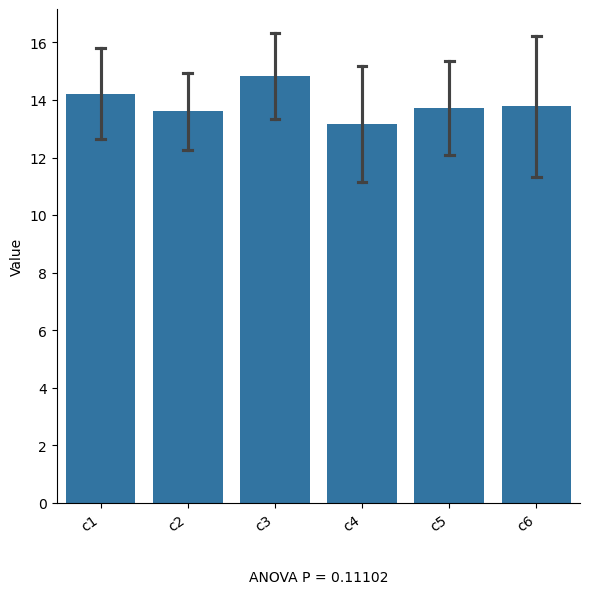

In [5]:
# User Accuracies at different steps for all conditions

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_3"]: count += 1
        user_acc[f"c{condition}"].append(count)
    print(f"Condition {condition}")
    print(f"Acc. greater than 75%: {sum(1 for acc in user_acc[f'c{condition}'] if acc >= 0.75 * 20)}")
    print(f"Acc. less than 50%: {sum(1 for acc in user_acc[f'c{condition}'] if acc <= 0.5 * 20)}")

print(user_acc)
user_acc = pd.DataFrame(user_acc)
plot_bar(user_acc)

Condition 1
Acc. greater than 75%: 13
Acc. less than 50%: 0
Condition 2
Acc. greater than 75%: 14
Acc. less than 50%: 1
Condition 3
Acc. greater than 75%: 16
Acc. less than 50%: 0
Condition 4
Acc. greater than 75%: 12
Acc. less than 50%: 1
Condition 5
Acc. greater than 75%: 16
Acc. less than 50%: 0
Condition 6
Acc. greater than 75%: 2
Acc. less than 50%: 1
{'c1': [20, 15, 18, 13, 18, 18, 19, 18, 20, 14, 14, 11, 16, 15, 16, 14, 15, 16], 'c2': [17, 18, 17, 15, 14, 17, 18, 14, 14, 15, 20, 15, 19, 16, 17, 16, 16, 10], 'c3': [17, 17, 17, 18, 18, 18, 16, 18, 18, 19, 14, 20, 16, 16, 16, 14, 18, 19], 'c4': [19, 16, 16, 16, 8, 15, 16, 12, 16, 16, 14, 16, 20, 13, 18, 14, 13, 15], 'c5': [18, 17, 18, 19, 18, 17, 18, 15, 16, 15, 12, 17, 18, 15, 16, 12, 15, 17], 'c6': [14, 12, 13, 14, 10, 13, 13, 13, 14, 12, 14, 13, 13, 13, 15, 15, 13, 12]}
One-way ANOVA results:
F-statistic: 7.8493211009174315
p-value: 2.7610115395950427e-06


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2  -0.1111    1.0 -2.1541  1.9319  False
    c1     c3   1.0556 0.6646 -0.9875  3.0986  False
    c1     c4  -0.9444 0.7605 -2.9875  1.0986  False
    c1     c5   0.1667 0.9999 -1.8764  2.2097  False
    c1     c6     -3.0 0.0006  -5.043  -0.957   True
    c2     c3   1.1667  0.562 -0.8764  3.2097  False
    c2     c4  -0.8333 0.8432 -2.8764  1.2097  False
    c2     c5   0.2778 0.9987 -1.7653  2.3208  False
    c2     c6  -2.8889 0.0011 -4.9319 -0.8459   True
    c3     c4     -2.0 0.0587  -4.043   0.043  False
    c3     c5  -0.8889 0.8038 -2.9319  1.1541  False
    c3     c6  -4.0556    0.0 -6.0986 -2.0125   True
    c4     c5   1.1111 0.6137 -0.9319  3.1541  False
    c4     c6  -2.0556 0.0477 -4.0986 -0.0125   True
    c5     c6  -3.1667 0.0003 -5.2097 -1.1236   True
-------------------

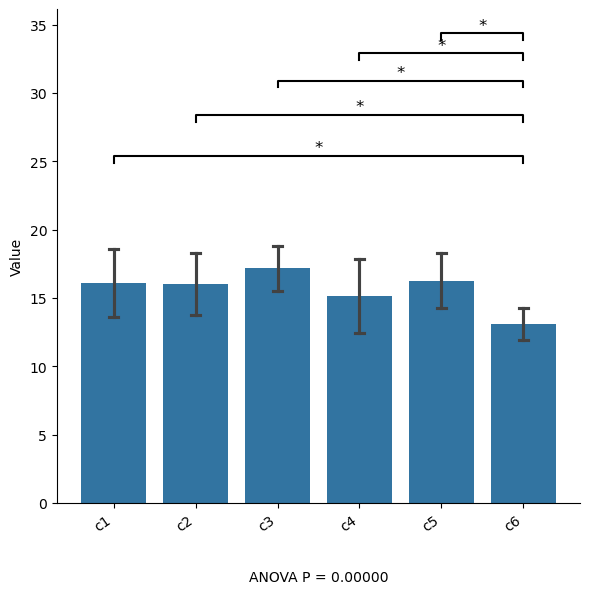

In [6]:
# User follow ai at different steps for all conditions

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
        user_acc[f"c{condition}"].append(count)
    print(f"Condition {condition}")
    print(f"Acc. greater than 75%: {sum(1 for acc in user_acc[f'c{condition}'] if acc >= 0.75 * 20)}")
    print(f"Acc. less than 50%: {sum(1 for acc in user_acc[f'c{condition}'] if acc <= 0.5 * 20)}")

print(user_acc)
user_acc = pd.DataFrame(user_acc)
plot_bar(user_acc)

{'c1': [93.33333333333333, 26.66666666666667, 73.33333333333334, 73.33333333333333, 86.66666666666667, 100.0, 100.0, 73.33333333333334, 100.0, 33.33333333333333, 26.66666666666667, 60.00000000000001, 66.66666666666667, 26.66666666666667, 60.00000000000001, 46.666666666666664, 80.0, 73.33333333333333], 'c2': [59.52380952380953, 76.1904761904762, 76.1904761904762, 69.04761904761905, 59.52380952380953, 83.33333333333334, 92.85714285714286, 45.23809523809524, 47.61904761904763, 52.38095238095237, 100.0, 66.66666666666667, 100.0, 69.04761904761905, 92.85714285714286, 45.23809523809524, 76.1904761904762, 38.0952380952381], 'c3': [81.25, 81.25, 100.0, 87.5, 68.75, 100.0, 56.25, 93.75, 93.75, 68.75, 37.5, 100.0, 75.0, 75.0, 62.5, 31.25, 68.75, 75.0], 'c4': [93.75, 56.25, 56.25, 56.25, -12.5, 50.0, 56.25, 31.25, 62.5, 75.0, 25.0, 56.25, 100.0, 18.75, 87.5, 62.5, 25.0, 50.0], 'c5': [87.5, 43.75, 87.5, 93.75, 87.5, 81.25, 68.75, 31.25, 31.25, 50.0, -12.5, 50.0, 93.75, 68.75, 68.75, 12.5, 43.75, 5

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




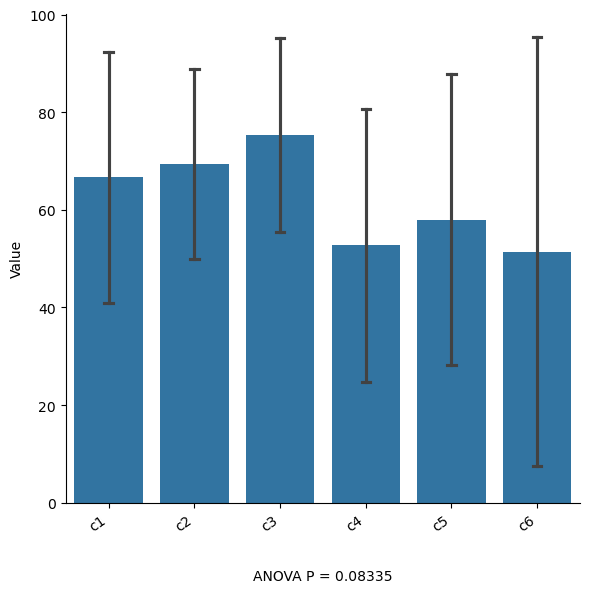

In [7]:
# User acc change from AI correct to AI incorrect
step = 3
user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        acc_ai_correct = 0
        acc_ai_incorrect = 0
        ai_correct_total = 0
        ai_incorrect_total = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_gt"]:
                ai_correct_total += 1
                if row[f"{i}_gt"] == row[f"{i}_{step}"]: acc_ai_correct += 1
            else:
                ai_incorrect_total += 1
                if row[f"{i}_gt"] == row[f"{i}_{step}"]: acc_ai_incorrect += 1
        user_acc[f"c{condition}"].append(((acc_ai_correct / ai_correct_total) - (acc_ai_incorrect / ai_incorrect_total)) * 100)

print(user_acc)
user_acc = pd.DataFrame(user_acc)
plot_bar(user_acc)

{'c1': [0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 3, 0], 'c2': [0, 1, 2, 2, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 4], 'c3': [0, 0, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0], 'c4': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], 'c5': [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], 'c6': [0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 3, 0, 0, 0, 1]}
One-way ANOVA results:
F-statistic: 3.323595505617977
p-value: 0.008024786856192427

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.3889 0.7458 -0.4367  1.2145  False
    c1     c3  -0.1111 0.9988 -0.9367  0.7145  False
    c1     c4  -0.6111 0.2705 -1.4367  0.2145  False
    c1     c5     -0.5 0.4966 -1.3256  0.3256  False
    c1     c6      0.0    1.0 -0.8256  0.8256  False
    c2     c3     -0.5 0.4966 -1.3256  0.3256  False
    c2     c4     -1.0 0.0083 -1.8256 -

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




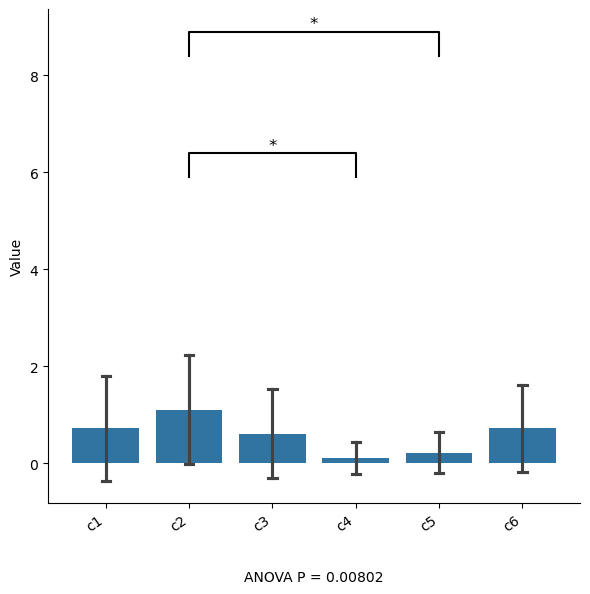

In [8]:
# Step 3 correct when step 1 or step 2 were wrong
step = 3
data = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            # S1 or S3 were wrong
            if (row[f"{i}_1"] != row[f"{i}_gt"]) and (row[f"{i}_2"] != row[f"{i}_gt"]):
                if row[f"{i}_3"] == row[f"{i}_gt"]:
                    count += 1
        data[f"c{condition}"].append(count)

print(data)
data = pd.DataFrame(data)
plot_bar(data)

{'c1': [5, 1, 2, 1, 1, 1, 5, 5, 4, 2, 0, 2, 0, 3, 2, 2, 1, 1], 'c2': [1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 1, 1, 0, 2, 0], 'c3': [0, 2, 2, 2, 2, 4, 0, 7, 1, 3, 2, 4, 3, 2, 0, 1, 3, 4], 'c4': [2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 4, 0], 'c5': [1, 2, 2, 3, 1, 3, 2, 0, 4, 0, 1, 0, 2, 1, 2, 0, 0, 0], 'c6': [6, 2, 8, 5, 4, 5, 4, 7, 7, 4, 4, 5, 5, 5, 3, 5, 1, 4]}
One-way ANOVA results:
F-statistic: 17.33297628156083
p-value: 2.1864000221012837e-12

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2  -1.3333 0.0767 -2.7482 0.0816  False
    c1     c3   0.2222 0.9975 -1.1927 1.6371  False
    c1     c4  -1.1667 0.1678 -2.5816 0.2482  False
    c1     c5  -0.7778 0.6026 -2.1927 0.6371  False
    c1     c6   2.5556    0.0  1.1406 3.9705   True
    c2     c3   1.5556 0.0224  0.1406 2.9705   True
    c2     c4   0.1667 0.9994 -1.2482 1.5816  

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




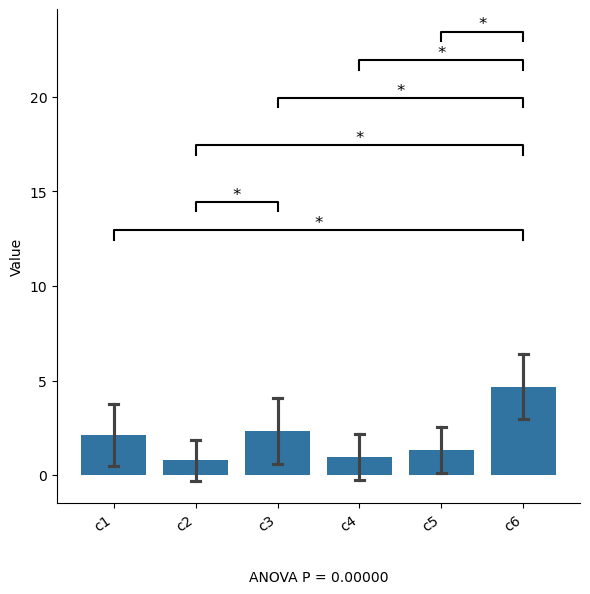

In [9]:
# Step 3/2 correct when step 1 was wrong
data = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            # S1 or S3 were wrong
            if (row[f"{i}_1"] != row[f"{i}_gt"]):
                if row[f"{i}_2"] == row[f"{i}_gt"]:
                    count += 1
        data[f"c{condition}"].append(count)

print(data)
data = pd.DataFrame(data)
plot_bar(data)

In [10]:
# Step 3/2 correct when step 1 was wrong
data = {
    "c1_s1_wrong": [],
    "c2_s1_wrong": [],
    "c3_s1_wrong": [],
    "c4_s1_wrong": [],   
    "c5_s1_wrong": [],
    "c6_s1_wrong": [],
    "c1_s2_wrong": [],
    "c2_s2_wrong": [],
    "c3_s2_wrong": [],
    "c4_s2_wrong": [],   
    "c5_s2_wrong": [],
    "c6_s2_wrong": [],
    "c1_s3_wrong": [],
    "c2_s3_wrong": [],
    "c3_s3_wrong": [],
    "c4_s3_wrong": [],   
    "c5_s3_wrong": [],
    "c6_s3_wrong": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        s1_wrong = 0
        s2_wrong = 0
        s3_wrong = 0
        for i in range(1, 21):
            # S1 or S3 were wrong
            if (row[f"{i}_1"] != row[f"{i}_gt"]):
                s1_wrong += 1
            if row[f"{i}_2"] == row[f"{i}_gt"]:
                s2_wrong += 1
            if row[f"{i}_3"] == row[f"{i}_gt"]:
                s3_wrong += 1
        data[f"c{condition}_s1_wrong"].append(s1_wrong)
        data[f"c{condition}_s2_wrong"].append(s2_wrong)
        data[f"c{condition}_s3_wrong"].append(s3_wrong)

print(data)
data = pd.DataFrame(data)
print(data.mean().to_markdown())
# plot_bar(data, show_anova=False)

{'c1_s1_wrong': [8, 5, 7, 11, 8, 7, 9, 9, 8, 9, 3, 8, 5, 7, 8, 5, 6, 9], 'c2_s1_wrong': [6, 5, 7, 7, 7, 5, 6, 7, 9, 6, 5, 1, 9, 5, 7, 6, 8, 10], 'c3_s1_wrong': [7, 7, 8, 6, 6, 7, 4, 9, 5, 6, 8, 6, 9, 9, 6, 7, 7, 6], 'c4_s1_wrong': [5, 5, 7, 6, 12, 7, 6, 9, 6, 8, 6, 6, 7, 8, 7, 10, 11, 7], 'c5_s1_wrong': [6, 4, 8, 7, 6, 7, 5, 5, 8, 6, 7, 5, 7, 10, 10, 8, 7, 6], 'c6_s1_wrong': [10, 8, 10, 7, 5, 7, 8, 9, 12, 6, 6, 8, 9, 9, 5, 7, 5, 7], 'c1_s2_wrong': [15, 16, 15, 10, 13, 13, 14, 15, 15, 13, 15, 14, 15, 16, 13, 17, 14, 11], 'c2_s2_wrong': [15, 12, 13, 13, 12, 15, 14, 12, 10, 13, 14, 19, 13, 14, 11, 14, 12, 10], 'c3_s2_wrong': [13, 13, 13, 14, 16, 14, 14, 14, 14, 15, 14, 16, 12, 12, 14, 14, 16, 17], 'c4_s2_wrong': [15, 14, 14, 14, 8, 13, 14, 10, 14, 12, 14, 14, 16, 13, 14, 10, 13, 13], 'c5_s2_wrong': [14, 17, 14, 15, 14, 15, 16, 15, 16, 13, 14, 15, 14, 11, 12, 12, 13, 13], 'c6_s2_wrong': [14, 12, 15, 14, 10, 13, 9, 15, 12, 12, 14, 11, 13, 15, 13, 13, 11, 10], 'c1_s3_wrong': [14, 16, 15, 11,

{'c1': [4, 5, 5, 6, 7, 5, 7, 7, 7, 6, 3, 5, 4, 4, 7, 6, 5, 5], 'c2': [5, 6, 7, 6, 6, 6, 7, 7, 5, 7, 7, 7, 7, 7, 7, 6, 7, 6], 'c3': [2, 6, 7, 4, 5, 6, 5, 5, 5, 5, 4, 6, 6, 2, 3, 5, 1, 4], 'c4': [3, 5, 5, 1, 3, 5, 1, 3, 1, 1, 5, 3, 6, 6, 2, 5, 5, 4], 'c5': [2, 2, 6, 6, 2, 5, 3, 1, 5, 4, 2, 4, 1, 5, 2, 3, 7, 4], 'c6': [5, 6, 5, 6, 5, 6, 5, 2, 7, 6, 7, 6, 7, 6, 4, 3, 4, 4]}
One-way ANOVA results:
F-statistic: 10.658293956727181
p-value: 2.9550842017111757e-08

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2      1.0 0.3344 -0.4328  2.4328  False
    c1     c3  -0.9444 0.3994 -2.3773  0.4884  False
    c1     c4  -1.8889  0.003 -3.3217  -0.456   True
    c1     c5  -1.8889  0.003 -3.3217  -0.456   True
    c1     c6  -0.2222 0.9976 -1.6551  1.2106  False
    c2     c3  -1.9444  0.002 -3.3773 -0.5116   True
    c2     c4  -2.8889    0.0 -4.321

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




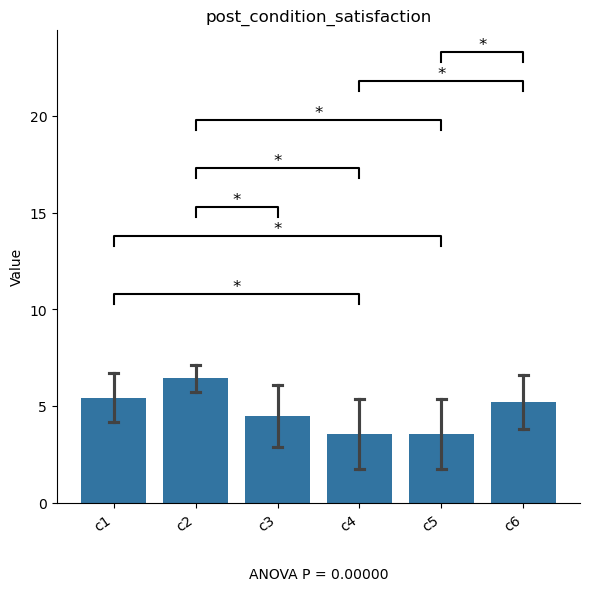

{'c1': [5, 4, 5, 5, 7, 6, 6, 7, 6, 6, 2, 6, 5, 6, 7, 6, 5, 6], 'c2': [6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 5, 7, 6], 'c3': [5, 6, 7, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 5], 'c4': [7, 5, 4, 6, 2, 4, 6, 7, 4, 5, 5, 6, 6, 6, 6, 5, 5, 5], 'c5': [5, 3, 7, 6, 6, 6, 4, 3, 4, 5, 1, 5, 7, 6, 5, 5, 6, 5], 'c6': [5, 4, 7, 6, 6, 7, 4, 7, 5, 6, 7, 6, 6, 5, 6, 5, 6, 3]}
One-way ANOVA results:
F-statistic: 1.506666666666666
p-value: 0.19429321705126282

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2   0.2222 0.9911 -0.8603 1.3047  False
    c1     c3   0.1667 0.9977 -0.9158 1.2492  False
    c1     c4  -0.3333  0.947 -1.4158 0.7492  False
    c1     c5  -0.6111 0.5744 -1.6936 0.4714  False
    c1     c6   0.0556    1.0 -1.0269  1.138  False
    c2     c3  -0.0556    1.0  -1.138 1.0269  False
    c2     c4  -0.5556 0.6709  -1.638 0.5269  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




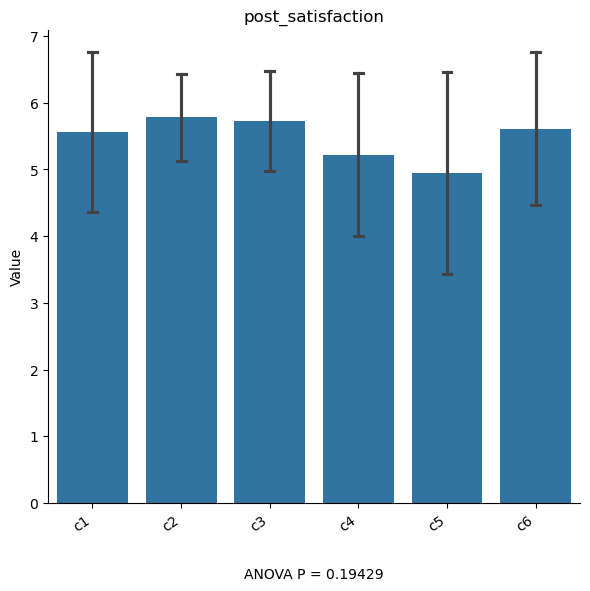

{'c1': [5, 5, 6, 5, 7, 6, 7, 7, 6, 5, 4, 5, 5, 6, 7, 7, 5, 6], 'c2': [6, 6, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 7, 5, 7, 5, 7, 6], 'c3': [7, 6, 7, 7, 7, 6, 6, 7, 2, 7, 6, 7, 6, 5, 6, 6, 7, 5], 'c4': [7, 7, 5, 7, 5, 6, 5, 2, 4, 7, 6, 7, 6, 6, 6, 6, 5, 5], 'c5': [5, 3, 7, 6, 5, 4, 3, 4, 3, 5, 2, 3, 3, 5, 2, 4, 7, 2], 'c6': [5, 5, 6, 6, 7, 7, 5, 7, 6, 6, 6, 6, 6, 4, 7, 3, 2, 5]}
One-way ANOVA results:
F-statistic: 7.247176554681917
p-value: 7.63758686354589e-06


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.4444 0.8882 -0.7508  1.6397  False
    c1     c3   0.3333 0.9651 -0.8619  1.5286  False
    c1     c4  -0.1111 0.9998 -1.3064  1.0841  False
    c1     c5  -1.7222 0.0008 -2.9175  -0.527   True
    c1     c6  -0.2778 0.9843  -1.473  0.9175  False
    c2     c3  -0.1111 0.9998 -1.3064  1.0841  False
    c2     c4  -0.5556 0.7563 -1.7508  0.6397  False
    c2     c5  -2.1667    0.0 -3.3619 -0.9714   True
    c2     c6  -0.7222 0.4992 -1.9175   0.473  False
    c3     c4  -0.4444 0.8882 -1.6397  0.7508  False
    c3     c5  -2.0556    0.0 -3.2508 -0.8603   True
    c3     c6  -0.6111 0.6745 -1.8064  0.5841  False
    c4     c5  -1.6111 0.0022 -2.8064 -0.4159   True
    c4     c6  -0.1667 0.9986 -1.3619  1.0286  False
    c5     c6   1.4444 0.0085  0.2492  2.6397   True
-------------------

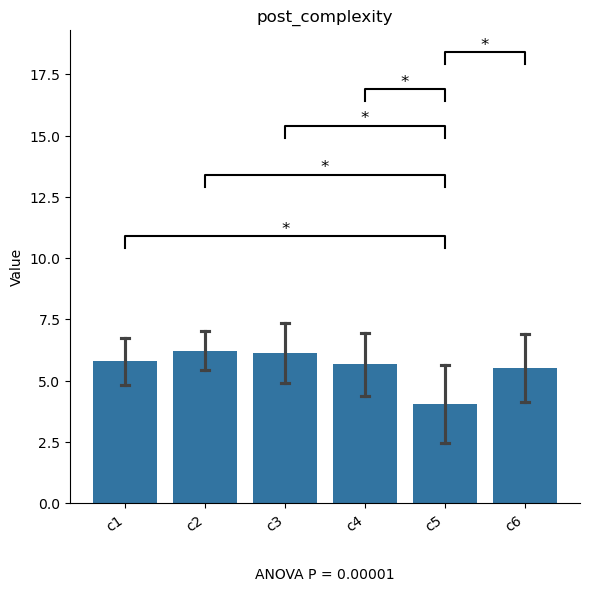

{'c1': [5, 6, 5, 5, 7, 6, 6, 7, 6, 6, 1, 5, 5, 7, 7, 6, 5, 5], 'c2': [6, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 5, 7, 7], 'c3': [5, 6, 7, 6, 7, 6, 6, 6, 4, 6, 6, 6, 5, 6, 6, 4, 6, 5], 'c4': [7, 5, 5, 6, 2, 4, 5, 1, 4, 5, 5, 6, 6, 6, 6, 5, 5, 3], 'c5': [5, 4, 6, 6, 6, 3, 4, 2, 4, 4, 2, 3, 7, 6, 4, 4, 6, 2], 'c6': [5, 5, 5, 6, 6, 7, 5, 7, 7, 5, 7, 6, 6, 4, 6, 4, 3, 4]}
One-way ANOVA results:
F-statistic: 4.569686288332745
p-value: 0.0008411508804034934

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.4444 0.8911 -0.7591   1.648  False
    c1     c3   0.1667 0.9986 -1.0369  1.3702  False
    c1     c4  -0.7778 0.4221 -1.9813  0.4258  False
    c1     c5  -1.2222 0.0443 -2.4258 -0.0187   True
    c1     c6  -0.1111 0.9998 -1.3147  1.0924  False
    c2     c3  -0.2778 0.9848 -1.4813  0.9258  False
    c2     c4  -1.2222 0.0443 -2.4258 

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




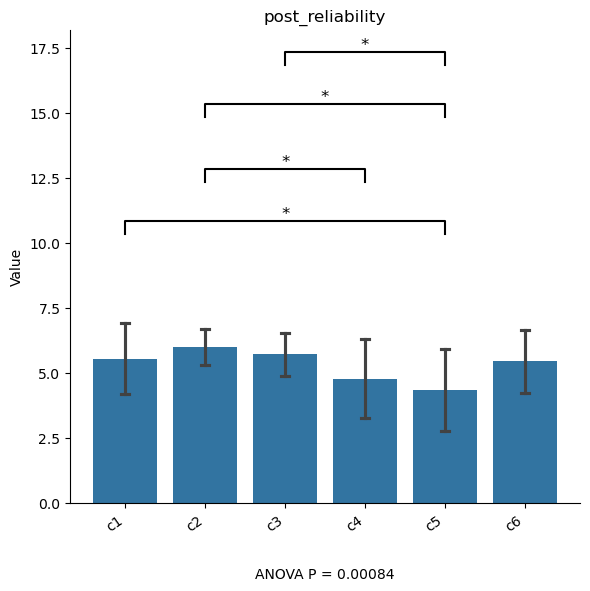

{'c1': [6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 2, 4, 5, 5, 6, 6, 5, 6], 'c2': [6, 5, 6, 6, 5, 6, 6, 6, 4, 5, 7, 7, 6, 6, 5, 4, 6, 5], 'c3': [5, 6, 7, 6, 6, 6, 4, 6, 4, 6, 5, 6, 6, 6, 5, 6, 6, 6], 'c4': [7, 5, 5, 6, 2, 5, 4, 2, 3, 5, 5, 6, 6, 5, 5, 6, 5, 4], 'c5': [5, 3, 6, 6, 6, 2, 4, 1, 5, 5, 2, 3, 7, 6, 2, 6, 6, 5], 'c6': [5, 6, 6, 5, 6, 7, 5, 7, 6, 6, 7, 5, 6, 5, 6, 5, 4, 4]}
One-way ANOVA results:
F-statistic: 3.4130668716372017
p-value: 0.006823815790628621

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.1667 0.9983 -0.9859  1.3193  False
    c1     c3   0.2222 0.9933 -0.9304  1.3748  False
    c1     c4  -0.6667 0.5481 -1.8193  0.4859  False
    c1     c5     -1.0  0.128 -2.1526  0.1526  False
    c1     c6   0.1667 0.9983 -0.9859  1.3193  False
    c2     c3   0.0556    1.0 -1.0971  1.2082  False
    c2     c4  -0.8333 0.2956 -1.9859 

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




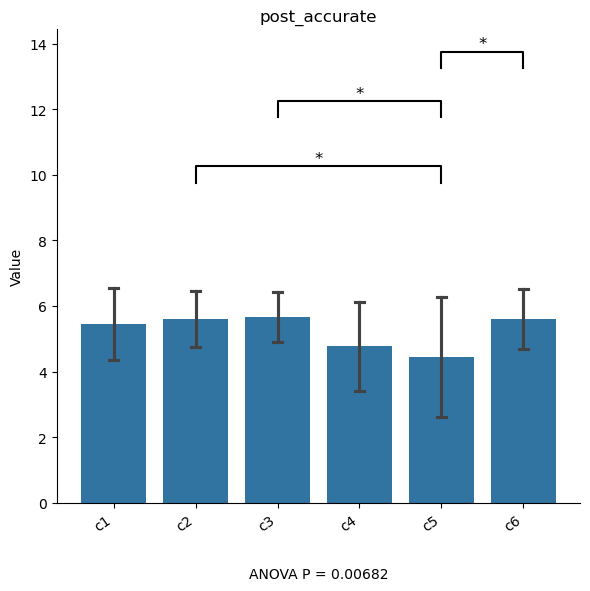

{'c1': [4, 3, 5, 6, 6, 6, 7, 7, 7, 4, 3, 5, 4, 4, 7, 6, 5, 6], 'c2': [5, 6, 6, 6, 6, 6, 6, 5, 4, 5, 6, 6, 7, 6, 5, 4, 6, 6], 'c3': [2, 6, 6, 3, 6, 6, 3, 6, 1, 5, 4, 6, 5, 5, 2, 4, 5, 5], 'c4': [7, 5, 5, 6, 3, 4, 1, 2, 2, 1, 4, 7, 4, 6, 6, 6, 4, 2], 'c5': [4, 3, 6, 6, 5, 3, 4, 1, 5, 4, 2, 4, 6, 5, 2, 3, 7, 2], 'c6': [5, 5, 7, 5, 6, 7, 3, 5, 5, 7, 7, 5, 7, 5, 6, 4, 2, 4]}
One-way ANOVA results:
F-statistic: 3.543796992481203
p-value: 0.005383915306640246


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2   0.3333 0.9861 -1.1408 1.8075  False
    c1     c3  -0.8333  0.573 -2.3075 0.6408  False
    c1     c4  -1.1111 0.2518 -2.5852  0.363  False
    c1     c5  -1.2778 0.1286 -2.7519 0.1963  False
    c1     c6      0.0    1.0 -1.4741 1.4741  False
    c2     c3  -1.1667 0.2041 -2.6408 0.3075  False
    c2     c4  -1.4444 0.0582 -2.9186 0.0297  False
    c2     c5  -1.6111 0.0237 -3.0852 -0.137   True
    c2     c6  -0.3333 0.9861 -1.8075 1.1408  False
    c3     c4  -0.2778  0.994 -1.7519 1.1963  False
    c3     c5  -0.4444 0.9515 -1.9186 1.0297  False
    c3     c6   0.8333  0.573 -0.6408 2.3075  False
    c4     c5  -0.1667 0.9995 -1.6408 1.3075  False
    c4     c6   1.1111 0.2518  -0.363 2.5852  False
    c5     c6   1.2778 0.1286 -0.1963 2.7519  False
-------------------------------------

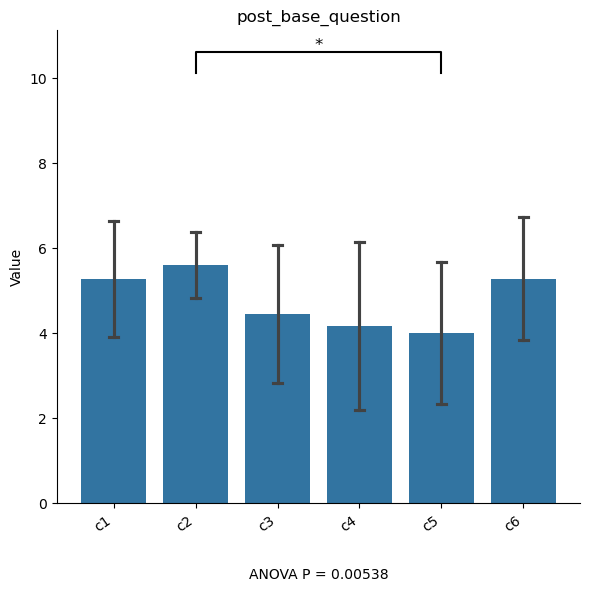

{'c1': [4, 6, 4, 5, 6, 6, 7, 6, 6, 6, 2, 4, 4, 7, 7, 6, 4, 4], 'c2': [4, 5, 5, 5, 5, 4, 6, 5, 3, 5, 6, 7, 7, 6, 5, 4, 7, 5], 'c3': [5, 6, 7, 5, 4, 6, 4, 4, 2, 5, 5, 2, 6, 7, 6, 5, 3, 6], 'c4': [7, 1, 5, 6, 2, 4, 1, 2, 1, 1, 5, 6, 4, 6, 4, 6, 5, 3], 'c5': [4, 1, 7, 7, 6, 5, 2, 1, 4, 5, 1, 3, 4, 3, 1, 4, 7, 2], 'c6': [6, 1, 5, 6, 5, 6, 4, 7, 6, 7, 7, 5, 6, 3, 6, 6, 5, 4]}
One-way ANOVA results:
F-statistic: 3.4174324590810494
p-value: 0.006770036248819227

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2      0.0    1.0 -1.6091 1.6091  False
    c1     c3  -0.3333 0.9907 -1.9424 1.2757  False
    c1     c4  -1.3889 0.1317  -2.998 0.2202  False
    c1     c5     -1.5 0.0825 -3.1091 0.1091  False
    c1     c6   0.0556    1.0 -1.5535 1.6646  False
    c2     c3  -0.3333 0.9907 -1.9424 1.2757  False
    c2     c4  -1.3889 0.1317  -2.998 0.2202  F

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




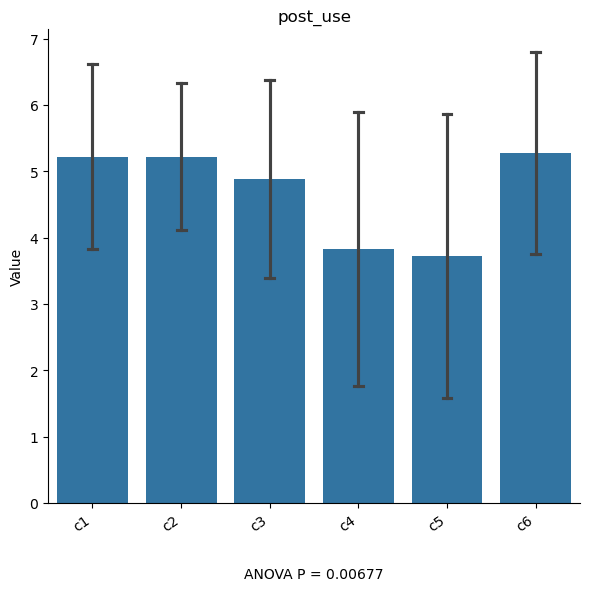

{'c1': [5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 2, 5, 4, 6, 7, 6, 4, 3], 'c2': [6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7, 6, 6, 5, 5, 7, 6], 'c3': [5, 6, 7, 6, 6, 6, 5, 5, 3, 5, 6, 5, 6, 5, 6, 4, 4, 5], 'c4': [7, 3, 5, 6, 2, 4, 5, 2, 2, 5, 4, 6, 6, 5, 6, 6, 5, 3], 'c5': [5, 2, 7, 6, 6, 4, 5, 2, 4, 5, 1, 3, 7, 5, 3, 5, 6, 3], 'c6': [5, 5, 6, 6, 5, 7, 4, 7, 4, 5, 7, 5, 6, 4, 6, 6, 5, 5]}
One-way ANOVA results:
F-statistic: 3.3906593406593406
p-value: 0.007106630592548945

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.6667 0.6082 -0.5527   1.886  False
    c1     c3   0.1111 0.9998 -1.1082  1.3305  False
    c1     c4  -0.6111 0.6929 -1.8305  0.6082  False
    c1     c5  -0.7778 0.4372 -1.9971  0.4416  False
    c1     c6   0.2778 0.9857 -0.9416  1.4971  False
    c2     c3  -0.5556 0.7714 -1.7749  0.6638  False
    c2     c4  -1.2778 0.0343 -2.4971 

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




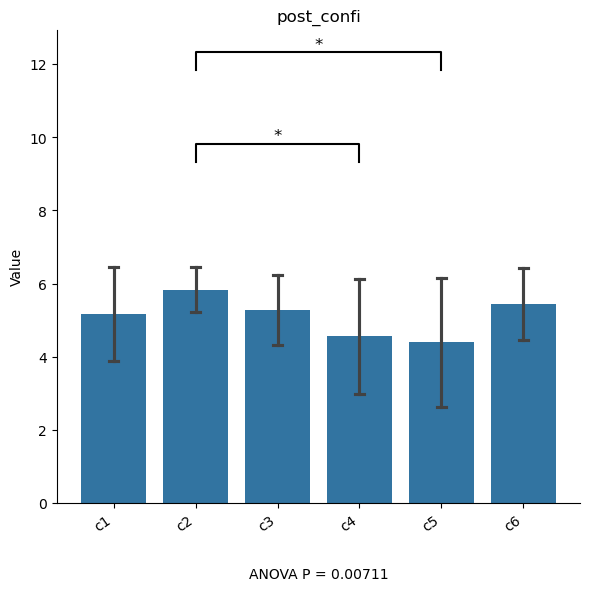

{'c1': [6, 5, 5, 5, 6, 6, 7, 7, 6, 6, 4, 4, 5, 7, 7, 5, 5, 7], 'c2': [6, 6, 7, 6, 6, 5, 7, 7, 5, 6, 7, 6, 7, 5, 7, 6, 7, 5], 'c3': [7, 7, 7, 6, 7, 6, 6, 6, 4, 6, 6, 6, 5, 3, 6, 6, 4, 6], 'c4': [7, 7, 5, 6, 5, 6, 4, 2, 4, 7, 6, 5, 6, 7, 2, 5, 5, 6], 'c5': [5, 3, 7, 6, 7, 5, 3, 6, 6, 5, 3, 3, 1, 7, 2, 6, 7, 4], 'c6': [4, 5, 4, 5, 7, 4, 4, 7, 7, 5, 2, 4, 7, 4, 7, 3, 7, 5]}
One-way ANOVA results:
F-statistic: 2.5343317972350228
p-value: 0.03321726429484597

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.4444 0.9265  -0.887  1.7759  False
    c1     c3   0.0556    1.0 -1.2759   1.387  False
    c1     c4  -0.4444 0.9265 -1.7759   0.887  False
    c1     c5  -0.9444 0.3164 -2.2759   0.387  False
    c1     c6  -0.6667 0.6937 -1.9981  0.6648  False
    c2     c3  -0.3889 0.9575 -1.7203  0.9425  False
    c2     c4  -0.8889 0.3847 -2.2203  

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




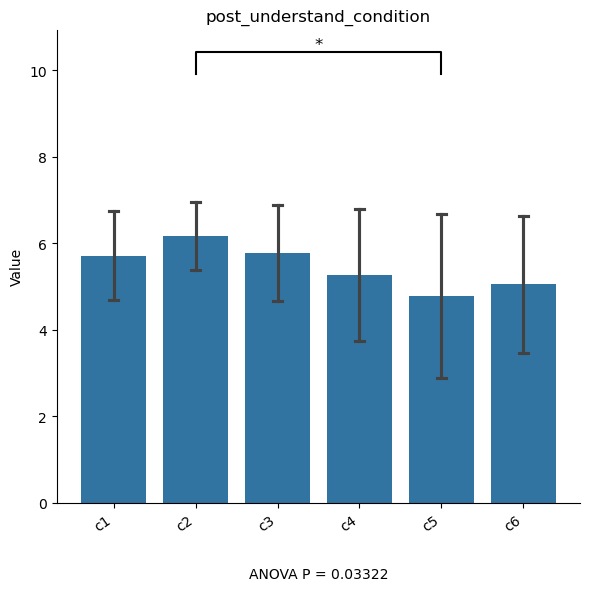

{'c1': [5, 6, 6, 5, 6, 6, 7, 7, 6, 4, 4, 3, 4, 6, 7, 6, 4, 6], 'c2': [6, 6, 6, 7, 4, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 7, 6], 'c3': [6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5], 'c4': [7, 5, 5, 6, 5, 5, 6, 2, 2, 5, 6, 6, 6, 6, 5, 5, 5, 4], 'c5': [5, 3, 6, 6, 6, 2, 6, 2, 5, 5, 2, 4, 6, 6, 4, 5, 7, 5], 'c6': [5, 5, 5, 6, 5, 7, 4, 7, 5, 6, 7, 4, 6, 5, 7, 4, 4, 5]}
One-way ANOVA results:
F-statistic: 3.036081139404402
p-value: 0.013498266578211843


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2      0.5 0.7648 -0.5877  1.5877  False
    c1     c3   0.3889 0.9038 -0.6988  1.4766  False
    c1     c4  -0.3889 0.9038 -1.4766  0.6988  False
    c1     c5  -0.7222 0.3909 -1.8099  0.3654  False
    c1     c6  -0.0556    1.0 -1.1432  1.0321  False
    c2     c3  -0.1111 0.9997 -1.1988  0.9766  False
    c2     c4  -0.8889 0.1754 -1.9766  0.1988  False
    c2     c5  -1.2222 0.0182 -2.3099 -0.1346   True
    c2     c6  -0.5556 0.6754 -1.6432  0.5321  False
    c3     c4  -0.7778 0.3075 -1.8654  0.3099  False
    c3     c5  -1.1111 0.0423 -2.1988 -0.0234   True
    c3     c6  -0.4444 0.8422 -1.5321  0.6432  False
    c4     c5  -0.3333 0.9481  -1.421  0.7543  False
    c4     c6   0.3333 0.9481 -0.7543   1.421  False
    c5     c6   0.6667 0.4829  -0.421  1.7543  False
-------------------

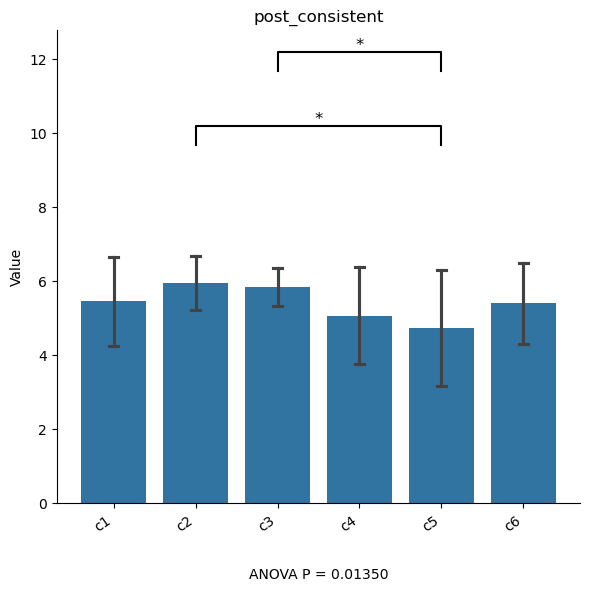

{'c1': [3, 6, 3, 5, 2, 5, 5, 2, 5, 4, 5, 5, 4, 4, 1, 2, 3, 5], 'c2': [3, 5, 4, 4, 1, 3, 5, 2, 3, 4, 2, 2, 4, 7, 1, 4, 2, 5], 'c3': [6, 3, 3, 1, 2, 4, 1, 6, 4, 2, 2, 3, 4, 1, 7, 6, 7, 2], 'c4': [6, 5, 5, 6, 3, 3, 1, 2, 1, 1, 3, 3, 2, 1, 5, 4, 5, 1], 'c5': [3, 6, 6, 4, 2, 3, 4, 1, 7, 2, 5, 1, 1, 1, 1, 6, 1, 3], 'c6': [5, 5, 6, 1, 1, 6, 6, 1, 5, 2, 3, 4, 3, 2, 1, 1, 5, 1]}
One-way ANOVA results:
F-statistic: 0.3698473282442747
p-value: 0.8682332645349052

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2  -0.4444  0.979 -2.2362 1.3473  False
    c1     c3  -0.2778 0.9976 -2.0696  1.514  False
    c1     c4  -0.6667  0.888 -2.4585 1.1251  False
    c1     c5  -0.6667  0.888 -2.4585 1.1251  False
    c1     c6  -0.6111   0.92 -2.4029 1.1807  False
    c2     c3   0.1667 0.9998 -1.6251 1.9585  False
    c2     c4  -0.2222 0.9992  -2.014 1.5696  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




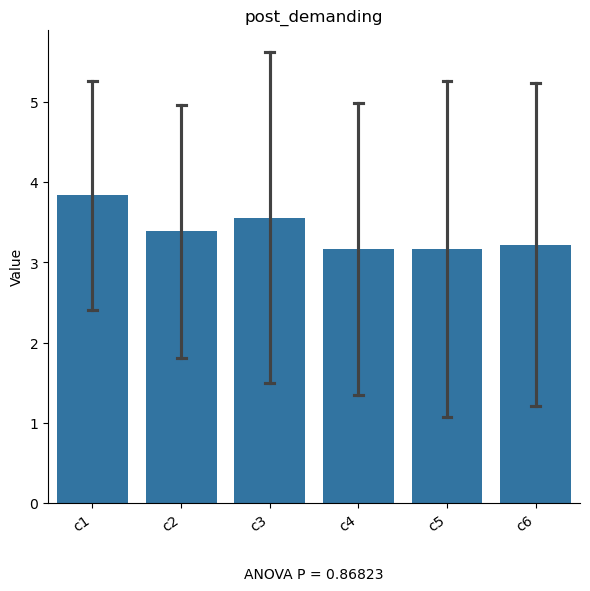

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




{'c1': [5, 7, 5, 5, 6, 5, 6, 7, 7, 6, 1, 3, 4, 6, 7, 6, 4, 5], 'c2': [4, 6, 6, 6, 6, 5, 7, 6, 4, 3, 7, 6, 6, 7, 7, 5, 7, 6], 'c3': [5, 6, 6, 4, 5, 6, 4, 5, 2, 5, 2, 6, 6, 6, 6, 5, 1, 5], 'c4': [7, 4, 6, 6, 3, 5, 1, 2, 1, 5, 5, 7, 5, 4, 6, 5, 5, 2], 'c5': [4, 3, 6, 6, 7, 4, 4, 2, 5, 5, 2, 4, 6, 6, 1, 3, 7, 2], 'c6': [5, 5, 5, 6, 5, 7, 4, 6, 6, 5, 6, 4, 7, 5, 6, 4, 6, 4]}
One-way ANOVA results:
F-statistic: 2.686031452358926
p-value: 0.02533441958908591

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2      0.5 0.9241 -0.9858  1.9858  False
    c1     c3  -0.5556 0.8859 -2.0414  0.9303  False
    c1     c4  -0.8889 0.5105 -2.3747   0.597  False
    c1     c5     -1.0 0.3755 -2.4858  0.4858  False
    c1     c6   0.0556    1.0 -1.4303  1.5414  False
    c2     c3  -1.0556 0.3147 -2.5414  0.4303  False
    c2     c4  -1.3889  0.081 -2.8747   

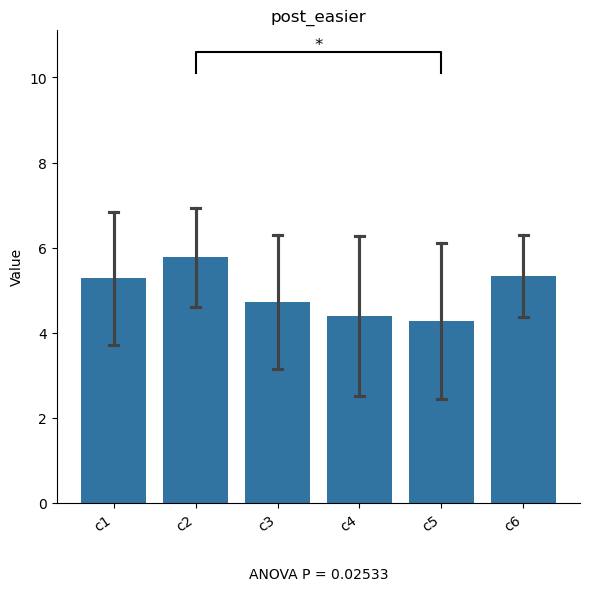

{'c1': [3, 6, 3, 5, 2, 3, 2, 1, 4, 3, 2, 5, 4, 4, 1, 2, 5, 2], 'c2': [2, 4, 2, 2, 1, 3, 2, 1, 5, 4, 2, 1, 3, 6, 1, 3, 1, 5], 'c3': [1, 3, 1, 1, 1, 3, 1, 4, 2, 1, 1, 3, 2, 1, 2, 3, 7, 2], 'c4': [1, 1, 5, 1, 2, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 5, 5, 1], 'c5': [5, 6, 6, 2, 1, 3, 5, 1, 3, 2, 6, 4, 3, 1, 1, 6, 1, 5], 'c6': [5, 6, 6, 1, 1, 1, 5, 3, 6, 1, 1, 3, 1, 1, 1, 5, 3, 3]}
One-way ANOVA results:
F-statistic: 1.6285391140433554
p-value: 0.1591348221213381

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2     -0.5 0.9499 -2.1458 1.1458  False
    c1     c3     -1.0 0.4929 -2.6458 0.6458  False
    c1     c4     -1.0 0.4929 -2.6458 0.6458  False
    c1     c5   0.2222 0.9988 -1.4236  1.868  False
    c1     c6  -0.2222 0.9988  -1.868 1.4236  False
    c2     c3     -0.5 0.9499 -2.1458 1.1458  False
    c2     c4     -0.5 0.9499 -2.1458 1.1458  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




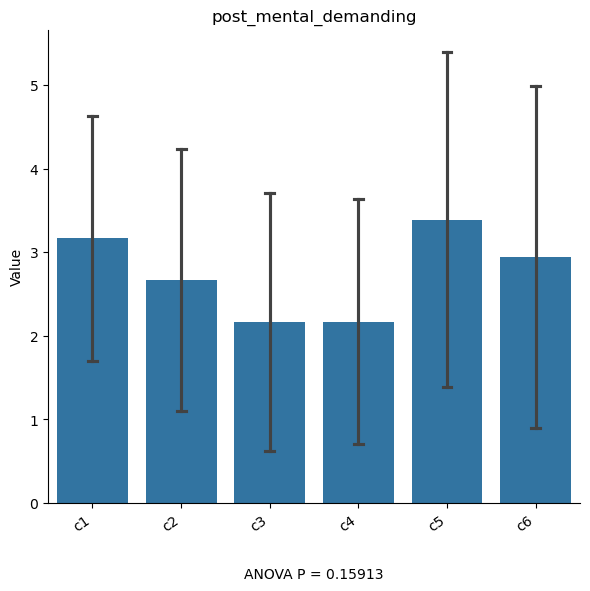

{'c1': [6, 5, 6, 5, 7, 6, 5, 6, 4, 6, 5, 3, 5, 5, 7, 4, 4, 5], 'c2': [6, 4, 6, 6, 7, 6, 6, 7, 5, 5, 7, 7, 7, 6, 7, 6, 4, 5], 'c3': [7, 6, 5, 6, 6, 4, 6, 5, 6, 6, 7, 7, 4, 4, 6, 6, 2, 6], 'c4': [7, 7, 5, 7, 5, 6, 7, 2, 6, 7, 5, 7, 6, 7, 6, 6, 5, 5], 'c5': [6, 7, 6, 5, 4, 4, 7, 7, 6, 7, 4, 7, 7, 7, 5, 6, 7, 5], 'c6': [5, 5, 6, 6, 7, 6, 5, 4, 6, 7, 6, 6, 7, 7, 7, 7, 6, 1]}
One-way ANOVA results:
F-statistic: 1.0325191396281441
p-value: 0.4026594324774816

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2   0.7222 0.4879 -0.4612 1.9057  False
    c1     c3   0.2778 0.9836 -0.9057 1.4612  False
    c1     c4   0.6667 0.5767 -0.5168 1.8501  False
    c1     c5   0.7222 0.4879 -0.4612 1.9057  False
    c1     c6   0.5556 0.7485 -0.6279  1.739  False
    c2     c3  -0.4444  0.884 -1.6279  0.739  False
    c2     c4  -0.0556    1.0  -1.239 1.1279  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




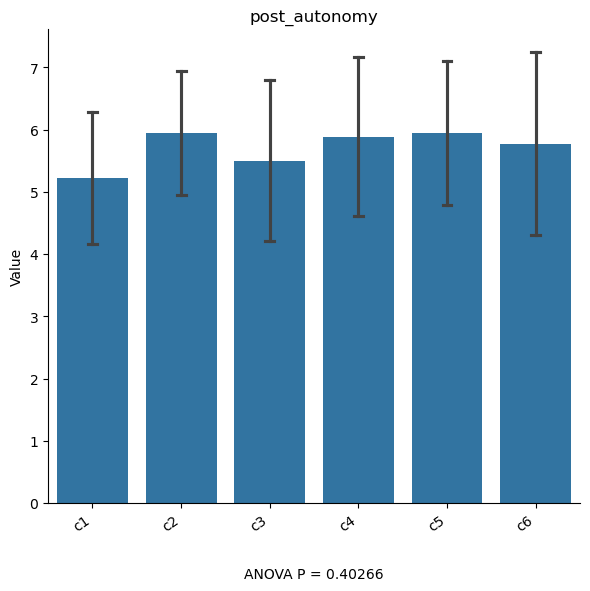

{'c1': [5, 6, 5, 5, 4, 4, 6, 7, 6, 6, 2, 3, 4, 5, 6, 6, 4, 4], 'c2': [4, 5, 6, 5, 3, 6, 6, 4, 4, 5, 6, 6, 6, 5, 5, 4, 6, 5], 'c3': [4, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 4, 6, 5, 3, 5], 'c4': [7, 5, 4, 4, 2, 4, 6, 2, 2, 3, 4, 7, 6, 5, 4, 5, 5, 2], 'c5': [5, 4, 7, 6, 6, 5, 4, 1, 4, 5, 2, 3, 5, 6, 2, 3, 6, 3], 'c6': [5, 5, 5, 6, 5, 6, 4, 7, 5, 5, 7, 5, 6, 5, 6, 5, 5, 3]}
One-way ANOVA results:
F-statistic: 2.015680880330124
p-value: 0.08262232765429892

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2   0.1667 0.9987 -1.0518 1.3852  False
    c1     c3   0.1111 0.9998 -1.1074 1.3296  False
    c1     c4  -0.6111 0.6923 -1.8296 0.6074  False
    c1     c5  -0.6111 0.6923 -1.8296 0.6074  False
    c1     c6   0.3889 0.9387 -0.8296 1.6074  False
    c2     c3  -0.0556    1.0 -1.2741  1.163  False
    c2     c4  -0.7778 0.4364 -1.9963 0.4407  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




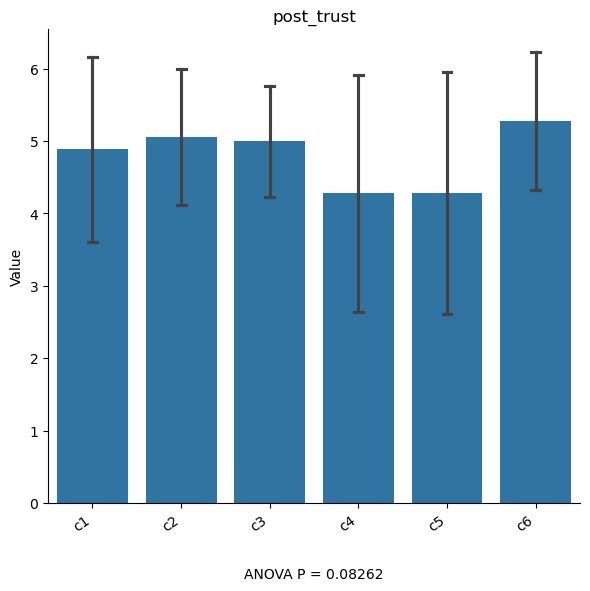

{'c1': [5, 6, 6, 5, 7, 6, 5, 5, 6, 4, 6, 2, 5, 7, 7, 6, 3, 3], 'c2': [6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 3, 4, 5, 5, 7], 'c3': [5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6], 'c4': [5, 3, 4, 4, 6, 6, 4, 2, 7, 7, 6, 5, 6, 7, 3, 6, 5, 5], 'c5': [6, 3, 6, 6, 5, 5, 5, 7, 3, 6, 2, 6, 6, 6, 6, 5, 7, 3], 'c6': [5, 6, 6, 7, 6, 5, 5, 7, 6, 4, 6, 5, 5, 3, 6, 4, 6, 5]}
One-way ANOVA results:
F-statistic: 0.5517266988488676
p-value: 0.7366662429768084

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2   0.2778 0.9829 -0.8948 1.4504  False
    c1     c3   0.3889 0.9284 -0.7837 1.5615  False
    c1     c4  -0.1667 0.9984 -1.3393 1.0059  False
    c1     c5  -0.0556    1.0 -1.2282  1.117  False
    c1     c6   0.1667 0.9984 -1.0059 1.3393  False
    c2     c3   0.1111 0.9998 -1.0615 1.2837  False
    c2     c4  -0.4444 0.8799  -1.617 0.7282  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




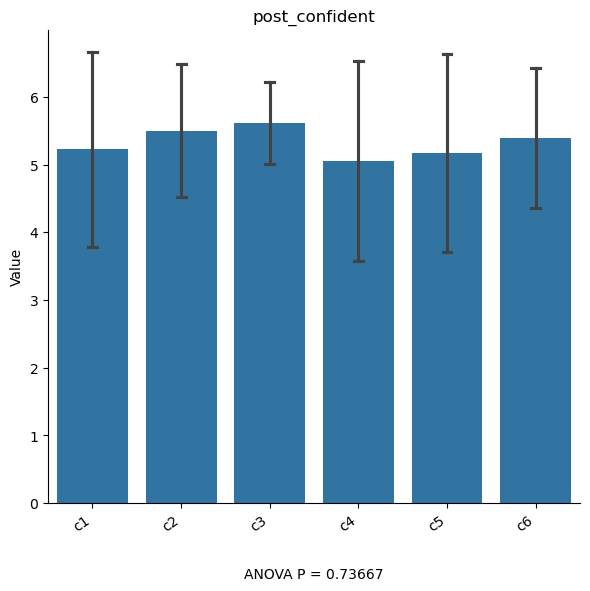

{'c1': [6, 7, 6, 5, 7, 5, 6, 7, 6, 5, 4, 5, 6, 4, 4, 6, 5, 6], 'c2': [4, 7, 6, 6, 6, 5, 7, 5, 5, 5, 7, 6, 7, 7, 5, 5, 7, 5], 'c3': [5, 4, 3, 4, 3, 6, 2, 5, 2, 5, 6, 7, 4, 5, 2, 6, 1, 5], 'c4': [7, 2, 5, 6, 2, 6, 1, 2, 3, 1, 4, 6, 2, 6, 4, 4, 5, 2], 'c5': [4, 2, 7, 6, 5, 5, 5, 1, 6, 3, 4, 5, 1, 6, 2, 5, 7, 3], 'c6': [5, 5, 6, 6, 2, 4, 3, 3, 6, 5, 6, 4, 1, 1, 5, 2, 2, 3]}
One-way ANOVA results:
F-statistic: 5.614492753623188
p-value: 0.00013014676128976957

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.2778 0.9952   -1.27  1.8256  False
    c1     c3  -1.3889  0.105 -2.9367  0.1589  False
    c1     c4  -1.7778 0.0147 -3.3256   -0.23   True
    c1     c5  -1.2778 0.1667 -2.8256    0.27  False
    c1     c6  -1.7222   0.02   -3.27 -0.1744   True
    c2     c3  -1.6667 0.0271 -3.2144 -0.1189   True
    c2     c4  -2.0556 0.0027 -3.6033

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




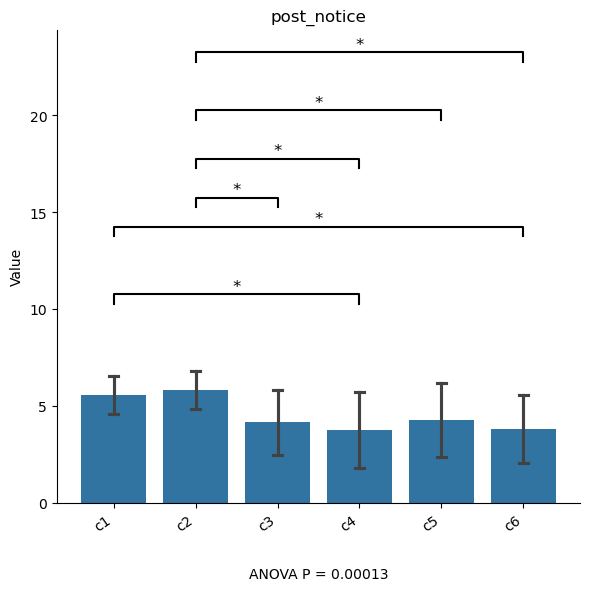

{'c1': [4, 5, 6, 5, 6, 5, 7, 7, 6, 5, 3, 4, 5, 6, 7, 6, 5, 5], 'c2': [4, 7, 7, 6, 5, 5, 7, 6, 4, 7, 7, 7, 7, 7, 7, 5, 7, 7], 'c3': [2, 7, 7, 4, 3, 6, 4, 6, 5, 5, 5, 5, 6, 2, 4, 5, 1, 5], 'c4': [3, 1, 4, 1, 4, 6, 1, 2, 1, 1, 4, 1, 4, 7, 2, 5, 5, 2], 'c5': [4, 3, 7, 7, 4, 3, 4, 1, 6, 5, 2, 4, 6, 5, 2, 4, 7, 2], 'c6': [5, 5, 6, 6, 6, 6, 3, 4, 5, 4, 1, 2, 6, 5, 6, 3, 5, 5]}
One-way ANOVA results:
F-statistic: 8.670676691729321
p-value: 7.070028430188648e-07


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.8333  0.605 -0.6862  2.3528  False
    c1     c3  -0.8333  0.605 -2.3528  0.6862  False
    c1     c4  -2.3889 0.0002 -3.9084 -0.8694   True
    c1     c5  -1.1667 0.2332 -2.6862  0.3528  False
    c1     c6  -0.7778 0.6734 -2.2973  0.7417  False
    c2     c3  -1.6667 0.0229 -3.1862 -0.1472   True
    c2     c4  -3.2222    0.0 -4.7417 -1.7027   True
    c2     c5     -2.0  0.003 -3.5195 -0.4805   True
    c2     c6  -1.6111  0.031 -3.1306 -0.0916   True
    c3     c4  -1.5556 0.0416  -3.075 -0.0361   True
    c3     c5  -0.3333 0.9879 -1.8528  1.1862  False
    c3     c6   0.0556    1.0 -1.4639   1.575  False
    c4     c5   1.2222 0.1893 -0.2973  2.7417  False
    c4     c6   1.6111  0.031  0.0916  3.1306   True
    c5     c6   0.3889 0.9759 -1.1306  1.9084  False
-------------------

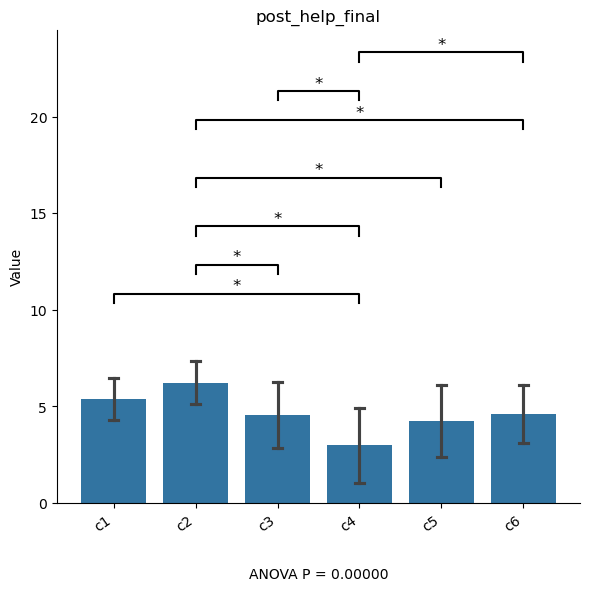

{'c1': [5, 6, 6, 5, 6, 5, 6, 7, 7, 4, 2, 4, 4, 6, 7, 7, 4, 5], 'c2': [5, 7, 7, 6, 5, 6, 6, 6, 4, 6, 6, 7, 6, 6, 5, 4, 7, 6], 'c3': [4, 6, 7, 4, 7, 6, 4, 5, 5, 6, 6, 5, 7, 5, 6, 5, 1, 5], 'c4': [7, 3, 5, 7, 4, 4, 1, 2, 1, 7, 5, 6, 5, 5, 5, 6, 5, 2], 'c5': [5, 4, 6, 6, 6, 4, 3, 1, 4, 4, 1, 3, 4, 6, 1, 3, 7, 4], 'c6': [5, 6, 6, 6, 6, 6, 3, 7, 3, 5, 7, 4, 7, 4, 7, 3, 5, 5]}
One-way ANOVA results:
F-statistic: 3.488165959453089
p-value: 0.005955314134543883


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2      0.5 0.9212 -0.9717  1.9717  False
    c1     c3  -0.1111 0.9999 -1.5828  1.3606  False
    c1     c4  -0.8889 0.4997 -2.3606  0.5828  False
    c1     c5  -1.3333  0.099  -2.805  0.1384  False
    c1     c6  -0.0556    1.0 -1.5272  1.4161  False
    c2     c3  -0.6111  0.833 -2.0828  0.8606  False
    c2     c4  -1.3889  0.076 -2.8606  0.0828  False
    c2     c5  -1.8333  0.006  -3.305 -0.3616   True
    c2     c6  -0.5556 0.8817 -2.0272  0.9161  False
    c3     c4  -0.7778 0.6426 -2.2495  0.6939  False
    c3     c5  -1.2222 0.1618 -2.6939  0.2495  False
    c3     c6   0.0556    1.0 -1.4161  1.5272  False
    c4     c5  -0.4444 0.9511 -1.9161  1.0272  False
    c4     c6   0.8333 0.5712 -0.6384   2.305  False
    c5     c6   1.2778 0.1274 -0.1939  2.7495  False
-------------------

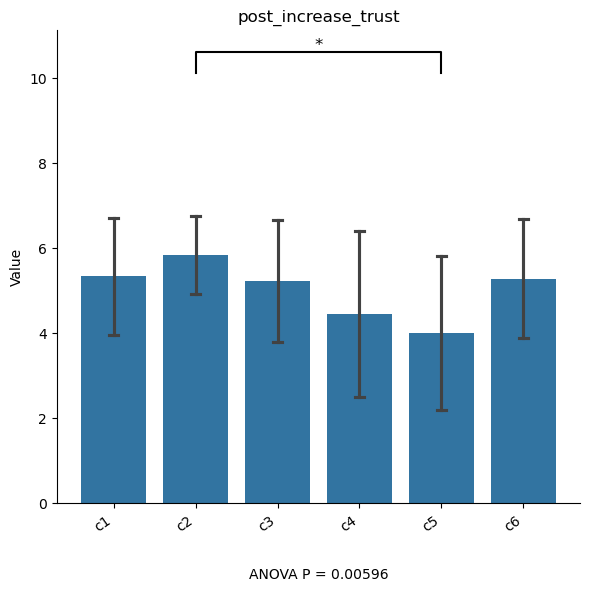

{'c1': [5, 6, 5, 5, 6, 6, 6, 7, 6, 3, 2, 3, 4, 6, 7, 6, 3, 6], 'c2': [6, 6, 6, 7, 4, 5, 6, 6, 4, 5, 6, 6, 5, 6, 5, 3, 6, 5], 'c3': [6, 5, 7, 6, 5, 6, 5, 5, 6, 5, 5, 5, 7, 6, 6, 4, 4, 6], 'c4': [7, 3, 4, 6, 2, 4, 4, 2, 1, 1, 4, 5, 4, 5, 5, 5, 5, 2], 'c5': [3, 1, 6, 6, 6, 3, 2, 1, 5, 4, 1, 3, 6, 6, 1, 3, 7, 5], 'c6': [5, 5, 5, 6, 5, 6, 3, 7, 6, 5, 7, 4, 6, 4, 7, 5, 5, 2]}
One-way ANOVA results:
F-statistic: 4.900429184549357
p-value: 0.00046426736547436424

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.2778 0.9929 -1.1443  1.6999  False
    c1     c3   0.3889 0.9679 -1.0332   1.811  False
    c1     c4  -1.2778 0.1042 -2.6999  0.1443  False
    c1     c5  -1.2778 0.1042 -2.6999  0.1443  False
    c1     c6   0.0556    1.0 -1.3666  1.4777  False
    c2     c3   0.1111 0.9999  -1.311  1.5332  False
    c2     c4  -1.5556 0.0235 -2.9777

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




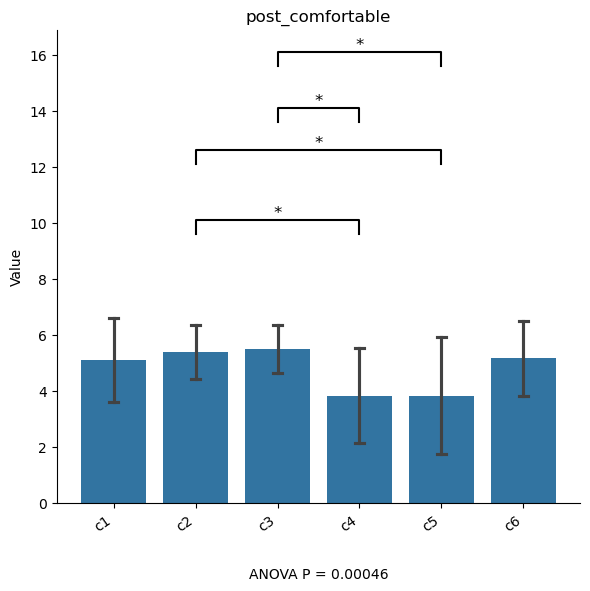

{'c1': [3, 7, 6, 5, 6, 6, 7, 7, 6, 5, 1, 4, 4, 5, 7, 6, 3, 4], 'c2': [4, 6, 6, 5, 5, 5, 6, 5, 4, 5, 6, 6, 6, 6, 5, 4, 6, 6], 'c3': [6, 6, 7, 4, 4, 6, 5, 6, 5, 6, 6, 3, 6, 7, 6, 4, 1, 6], 'c4': [7, 1, 4, 6, 2, 5, 1, 2, 1, 7, 5, 6, 4, 6, 4, 6, 5, 2], 'c5': [4, 1, 6, 7, 5, 2, 2, 1, 4, 4, 1, 3, 4, 4, 2, 4, 7, 3], 'c6': [5, 6, 6, 6, 5, 6, 3, 7, 7, 7, 7, 4, 6, 3, 6, 4, 5, 3]}
One-way ANOVA results:
F-statistic: 3.9374376039933447
p-value: 0.0026371591766664922


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2   0.2222 0.9984 -1.3446   1.789  False
    c1     c3   0.1111 0.9999 -1.4557  1.6779  False
    c1     c4     -1.0 0.4365 -2.5668  0.5668  False
    c1     c5  -1.5556 0.0528 -3.1224  0.0112  False
    c1     c6   0.2222 0.9984 -1.3446   1.789  False
    c2     c3  -0.1111 0.9999 -1.6779  1.4557  False
    c2     c4  -1.2222 0.2178  -2.789  0.3446  False
    c2     c5  -1.7778 0.0166 -3.3446  -0.211   True
    c2     c6      0.0    1.0 -1.5668  1.5668  False
    c3     c4  -1.1111 0.3167 -2.6779  0.4557  False
    c3     c5  -1.6667 0.0302 -3.2335 -0.0999   True
    c3     c6   0.1111 0.9999 -1.4557  1.6779  False
    c4     c5  -0.5556 0.9068 -2.1224  1.0112  False
    c4     c6   1.2222 0.2178 -0.3446   2.789  False
    c5     c6   1.7778 0.0166   0.211  3.3446   True
-------------------

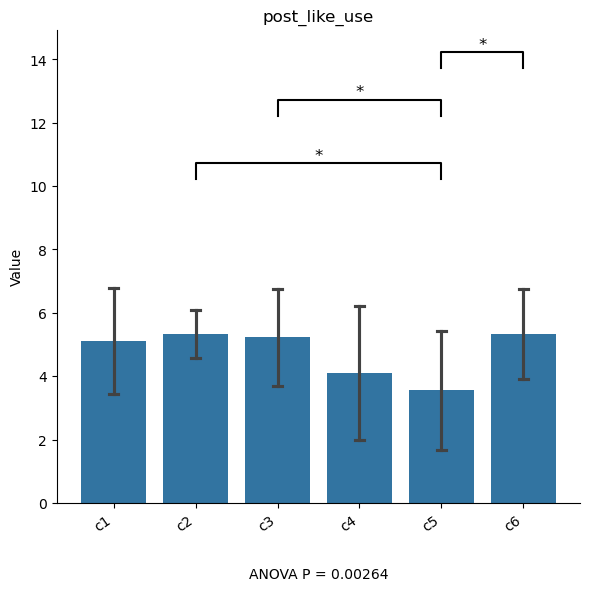

{'c1': [5, 6, 3, 5, 5, 5, 5, 7, 2, 2, 2, 3, 1, 6, 7, 4, 4, 3], 'c2': [1, 6, 5, 4, 5, 3, 2, 5, 4, 4, 6, 6, 6, 6, 4, 2, 2, 4], 'c3': [7, 5, 4, 3, 7, 6, 2, 5, 4, 5, 4, 3, 5, 4, 7, 4, 1, 5], 'c4': [2, 1, 4, 7, 2, 4, 2, 2, 1, 3, 5, 2, 4, 6, 4, 5, 5, 3], 'c5': [4, 2, 6, 6, 1, 1, 3, 4, 5, 4, 4, 4, 7, 5, 5, 4, 5, 3], 'c6': [5, 5, 4, 1, 4, 4, 3, 7, 6, 1, 5, 3, 6, 1, 2, 5, 4, 5]}
One-way ANOVA results:
F-statistic: 0.7540657276995306
p-value: 0.5850098167049156

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    c1     c2      0.0    1.0 -1.6489 1.6489  False
    c1     c3   0.3333 0.9917 -1.3156 1.9822  False
    c1     c4  -0.7222 0.7994 -2.3711 0.9267  False
    c1     c5  -0.1111    1.0   -1.76 1.5378  False
    c1     c6  -0.2222 0.9988 -1.8711 1.4267  False
    c2     c3   0.3333 0.9917 -1.3156 1.9822  False
    c2     c4  -0.7222 0.7994 -2.3711 0.9267  Fal

/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




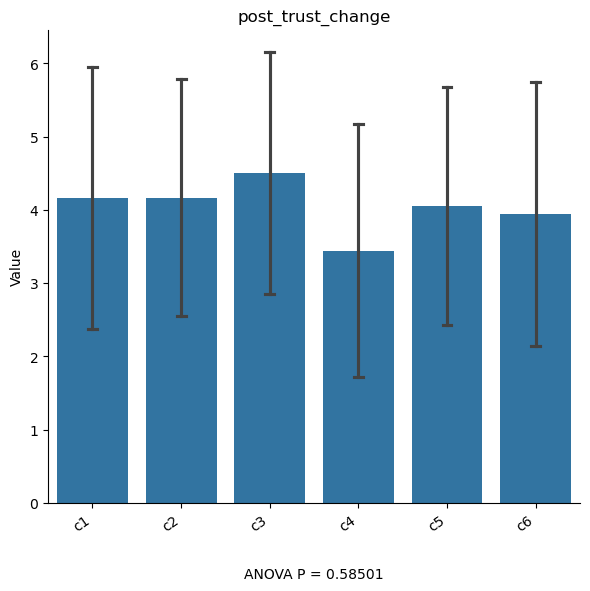

In [11]:
# Survey Questions

questions = [
    "post_condition_satisfaction",
    "post_satisfaction",
    "post_complexity",
    "post_reliability",
    "post_accurate",
    "post_base_question",
    "post_use",
    "post_confi",
    "post_understand_condition",
    "post_consistent",
    "post_demanding",
    "post_easier",
    "post_mental_demanding",
    "post_autonomy",
    "post_trust",
    "post_confident",
    "post_notice",
    "post_help_final",
    "post_increase_trust",
    "post_comfortable",
    "post_like_use",
    "post_trust_change"
]

for q in questions:
    data = {
        "c1": [],
        "c2": [],
        "c3": [],
        "c4": [],
        "c5": [],
        "c6": [],
    }
    for c in range(1, 7):
        for index, row in df.iterrows():
            if row['condition'] != c: continue
            data[f"c{c}"].append(row[q])

    print(data)
    data = pd.DataFrame(data)
    plot_bar(data, title=q)

In [12]:
# Acc above 75% - FOR PROLIFIC BONUS

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    print(f"Condition {condition}")
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_3"]: count += 1
        user_acc[f"c{condition}"].append(count)
        if count / 20 >= .75:
            print(row['user_id'])

Condition 1
P6
P18
P1
P5
P7
P17
P9
P8
P16
P12
Condition 2
P2
P3
P1
P11
Condition 3
P18
P3
P1
P7
P17
P15
P9
P11
P14
P16
P12
P10
Condition 4
P2
P17
P13
Condition 5
P6
P4
P5
P7
P17
P13
Condition 6
P18
P4
P3
P7
P15
P9
P11
P8
P14
P12


# GENERAL RESULTS DIVIDED BY USER TYPE

In [13]:
# HS vs non-HS on ACC

df = load_data()
df_hs = df[df['education'] == "High school degree"]
df_college = df[df['education'] != "High school degree"]

user_acc = {
    "hs": [],
    "non-hs": [],
}

for step in range(1, 4):
    for index, row in df_hs.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["hs"].append(count)

    for index, row in df_college.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["non-hs"].append(count)

    print(user_acc)
    from scipy import stats

    anova_result = stats.f_oneway(user_acc["hs"], user_acc["non-hs"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

{'hs': [12, 11, 12, 11, 12, 12, 15, 15, 14, 13, 11, 15, 12, 13, 12, 14, 14, 16, 14, 11, 14, 13, 14, 15, 14, 8, 13, 14, 11, 14, 14, 13, 13, 10, 9, 13, 14, 13, 14, 15, 12, 13, 13, 10, 12, 14, 10, 12, 13, 13, 11, 14, 14, 12, 11, 11, 15], 'non-hs': [15, 13, 9, 12, 13, 11, 17, 15, 13, 14, 11, 14, 13, 13, 13, 15, 11, 14, 15, 19, 13, 14, 10, 13, 13, 11, 15, 12, 14, 11, 13, 15, 13, 12, 14, 12, 16, 12, 13, 15, 14, 15, 10, 13, 10, 15, 12, 8, 15, 13, 13]}
ANOVA p-value for step 1: 0.3060101101970079
{'hs': [12, 11, 12, 11, 12, 12, 15, 15, 14, 13, 11, 15, 12, 13, 12, 14, 14, 16, 14, 11, 14, 13, 14, 15, 14, 8, 13, 14, 11, 14, 14, 13, 13, 10, 9, 13, 14, 13, 14, 15, 12, 13, 13, 10, 12, 14, 10, 12, 13, 13, 11, 14, 14, 12, 11, 11, 15, 15, 15, 15, 13, 14, 13, 17, 12, 14, 12, 13, 14, 12, 13, 13, 14, 16, 14, 15, 12, 14, 14, 17, 14, 14, 8, 13, 14, 10, 14, 14, 16, 14, 10, 13, 13, 14, 15, 14, 15, 16, 14, 14, 12, 12, 13, 14, 12, 14, 13, 15, 12, 14, 11, 13, 15, 11], 'non-hs': [15, 13, 9, 12, 13, 11, 17, 15, 13

In [14]:
# HS vs non-HS on follow AI at different steps

df = load_data()
df_hs = df[df['education'] == "High school degree"]
df_college = df[df['education'] == "College degree"]
df_others = df[~df['education'].isin(["College degree", "High school degree"])]

user_acc = {
    "hs": [],
    "college": [],
    "others": [],
}

for step in range(1, 4):
    for index, row in df_hs.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_{step}"]: count += 1
        user_acc["hs"].append(count)

    for index, row in df_college.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_{step}"]: count += 1
        user_acc["college"].append(count)

    for index, row in df_others.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_{step}"]: count += 1
        user_acc["others"].append(count)

    print(user_acc)
    from scipy import stats

    anova_result = stats.f_oneway(user_acc["hs"], user_acc["college"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

    anova_result = stats.f_oneway(user_acc["hs"], user_acc["others"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

    anova_result = stats.f_oneway(user_acc["others"], user_acc["college"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

{'hs': [13, 12, 15, 12, 9, 13, 12, 15, 14, 13, 15, 13, 14, 13, 14, 14, 16, 14, 14, 13, 16, 13, 14, 15, 16, 8, 13, 16, 11, 16, 14, 17, 17, 14, 9, 15, 16, 15, 16, 15, 12, 11, 15, 14, 12, 16, 12, 10, 13, 13, 13, 14, 14, 12, 15, 11, 15], 'college': [14, 16, 16, 12, 16, 13, 14, 16, 15, 13, 14, 13, 13, 16, 10, 17, 11, 7, 15, 12, 14, 11, 15, 15, 13, 16, 12, 12, 14, 13, 15, 14, 17, 14, 15, 12, 15, 10, 8, 15, 15, 13], 'others': [12, 17, 12, 12, 17, 15, 13, 15, 16]}
ANOVA p-value for step 1: 0.9648939394462629
ANOVA p-value for step 1: 0.31932645598750076
ANOVA p-value for step 1: 0.3704312673210126
{'hs': [13, 12, 15, 12, 9, 13, 12, 15, 14, 13, 15, 13, 14, 13, 14, 14, 16, 14, 14, 13, 16, 13, 14, 15, 16, 8, 13, 16, 11, 16, 14, 17, 17, 14, 9, 15, 16, 15, 16, 15, 12, 11, 15, 14, 12, 16, 12, 10, 13, 13, 13, 14, 14, 12, 15, 11, 15, 20, 18, 20, 14, 11, 16, 14, 18, 18, 14, 19, 16, 16, 17, 17, 18, 18, 16, 19, 16, 16, 14, 19, 16, 16, 8, 15, 16, 12, 16, 14, 20, 18, 14, 13, 15, 18, 19, 18, 15, 16, 12, 18,

In [15]:
# HS vs non-HS acc when last step was wrong

df = load_data()
df_hs = df[df['education'] == "High school degree"]
df_college = df[df['education'] != "High school degree"]

user_acc = {
    "hs": [],
    "non-hs": [],
}

for step in range(2, 4):
    for index, row in df_hs.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_1"] != row[f"{i}_gt"] and row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["hs"].append(count)

    for index, row in df_college.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_1"] != row[f"{i}_gt"] and row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["non-hs"].append(count)

    print(user_acc)
    from scipy import stats

    anova_result = stats.f_oneway(user_acc["hs"], user_acc["non-hs"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

{'hs': [5, 5, 4, 2, 2, 2, 2, 0, 2, 0, 3, 1, 2, 2, 2, 2, 2, 0, 3, 2, 0, 1, 4, 1, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 4, 0, 1, 3, 1, 0, 4, 1, 2, 2, 0, 0, 6, 2, 5, 5, 7, 4, 4, 5, 5, 5, 1], 'non-hs': [1, 2, 1, 1, 1, 5, 0, 0, 3, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 4, 7, 1, 2, 4, 3, 3, 2, 2, 0, 2, 1, 2, 2, 3, 2, 0, 0, 1, 0, 8, 4, 4, 7, 3, 5, 4]}
ANOVA p-value for step 2: 0.5929197860042003
{'hs': [5, 5, 4, 2, 2, 2, 2, 0, 2, 0, 3, 1, 2, 2, 2, 2, 2, 0, 3, 2, 0, 1, 4, 1, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 4, 0, 1, 3, 1, 0, 4, 1, 2, 2, 0, 0, 6, 2, 5, 5, 7, 4, 4, 5, 5, 5, 1, 4, 5, 4, 2, 5, 2, 2, 1, 2, 1, 4, 2, 3, 2, 5, 2, 2, 0, 3, 2, 1, 2, 4, 1, 0, 0, 1, 0, 0, 1, 0, 3, 1, 0, 5, 0, 1, 3, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 5, 1, 5, 3, 4, 5, 3, 7, 0], 'non-hs': [1, 2, 1, 1, 1, 5, 0, 0, 3, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 4, 7, 1, 2, 4, 3, 3, 2, 2, 0, 2, 1, 2, 2, 3, 2, 0, 0, 1, 0, 8, 4, 4, 7, 3, 5, 4, 1, 2, 3, 1, 3, 6, 1, 0, 3, 4, 1, 1, 2, 2, 3, 2, 0, 1, 3, 0, 3, 0, 4, 0, 6, 8, 2, 4, 4, 3, 3, 2,

In [16]:
# familiar with diabetes vs not familiar with diabetes on acc

df = load_data()
df_low = df[(df['familiar_with_diabetes'] >= 0) & (df['familiar_with_diabetes'] <= 2)]
df_mid = df[(df['familiar_with_diabetes'] >= 3) & (df['familiar_with_diabetes'] <= 5)]
df_high = df[(df['familiar_with_diabetes'] >= 6) & (df['familiar_with_diabetes'] <= 7)]

print(df_low.shape)
print(df_mid.shape)
print(df_high.shape)


user_acc = {
    "low": [],
    "mid": [],
    "high": [],
}

for step in range(1, 4):
    for index, row in df_low.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["low"].append(count)

    for index, row in df_mid.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["mid"].append(count)

    for index, row in df_high.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["high"].append(count)

    print(user_acc)
    from scipy import stats

    anova_result = stats.f_oneway(user_acc["low"], user_acc["mid"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

    anova_result = stats.f_oneway(user_acc["low"], user_acc["high"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

    anova_result = stats.f_oneway(user_acc["high"], user_acc["mid"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

(26, 286)
(55, 286)
(27, 286)
{'low': [15, 12, 11, 13, 14, 14, 11, 13, 14, 16, 15, 13, 14, 11, 12, 14, 13, 13, 15, 15, 13, 12, 14, 13, 15, 8], 'mid': [12, 13, 12, 13, 11, 12, 12, 14, 14, 15, 13, 15, 15, 15, 12, 10, 13, 13, 14, 14, 13, 14, 12, 11, 11, 14, 13, 13, 15, 14, 8, 13, 14, 14, 13, 12, 10, 9, 14, 16, 13, 14, 12, 14, 10, 10, 10, 13, 14, 12, 11, 15, 13, 15, 13], 'high': [15, 9, 11, 11, 17, 13, 15, 13, 13, 11, 19, 12, 11, 14, 14, 15, 13, 12, 15, 13, 13, 12, 10, 12, 11, 14, 11]}
ANOVA p-value for step 1: 0.3399098546244901
ANOVA p-value for step 1: 0.6247169123537363
ANOVA p-value for step 1: 0.7763076713080765
{'low': [15, 12, 11, 13, 14, 14, 11, 13, 14, 16, 15, 13, 14, 11, 12, 14, 13, 13, 15, 15, 13, 12, 14, 13, 15, 8, 15, 13, 11, 13, 14, 13, 13, 11, 14, 14, 14, 14, 14, 10, 12, 14, 14, 15, 16, 15, 14, 12, 13, 14, 10, 12], 'mid': [12, 13, 12, 13, 11, 12, 12, 14, 14, 15, 13, 15, 15, 15, 12, 10, 13, 13, 14, 14, 13, 14, 12, 11, 11, 14, 13, 13, 15, 14, 8, 13, 14, 14, 13, 12, 10, 9, 14,

In [17]:
# familiar with diabetes vs not familiar with diabetes on follow ai

df = load_data()
df_hs = df[df['familiar_with_diabetes'] >= 4]
df_college = df[df['familiar_with_diabetes'] > 4]

print(df_hs.shape)
print(df_college.shape)

user_acc = {
    "hs": [],
    "non-hs": [],
}

for step in range(1, 4):
    for index, row in df_hs.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_{step}"]: count += 1
        user_acc["hs"].append(count)

    for index, row in df_college.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_{step}"]: count += 1
        user_acc["non-hs"].append(count)

    print(user_acc)
    from scipy import stats

    anova_result = stats.f_oneway(user_acc["hs"], user_acc["non-hs"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

(67, 286)
(47, 286)
{'hs': [14, 16, 12, 17, 16, 12, 12, 12, 12, 9, 12, 12, 16, 13, 15, 13, 13, 13, 15, 13, 14, 10, 13, 14, 14, 11, 7, 14, 14, 11, 16, 13, 15, 14, 15, 15, 8, 13, 14, 17, 12, 9, 15, 16, 14, 16, 15, 16, 14, 17, 15, 14, 14, 15, 10, 12, 13, 10, 13, 14, 14, 12, 15, 11, 15, 15, 13], 'non-hs': [14, 16, 12, 17, 16, 12, 12, 12, 12, 12, 13, 13, 13, 15, 14, 10, 14, 14, 7, 14, 13, 15, 14, 15, 15, 14, 12, 15, 16, 15, 16, 17, 15, 14, 14, 15, 10, 12, 13, 10, 13, 14, 14, 15, 11, 15, 13]}
ANOVA p-value for step 1: 0.7047664654957446
{'hs': [14, 16, 12, 17, 16, 12, 12, 12, 12, 9, 12, 12, 16, 13, 15, 13, 13, 13, 15, 13, 14, 10, 13, 14, 14, 11, 7, 14, 14, 11, 16, 13, 15, 14, 15, 15, 8, 13, 14, 17, 12, 9, 15, 16, 14, 16, 15, 16, 14, 17, 15, 14, 14, 15, 10, 12, 13, 10, 13, 14, 14, 12, 15, 11, 15, 15, 13, 15, 18, 13, 18, 18, 19, 18, 14, 14, 11, 15, 14, 17, 14, 17, 14, 14, 20, 15, 16, 16, 10, 17, 17, 18, 18, 18, 19, 20, 16, 16, 14, 18, 19, 19, 16, 8, 15, 14, 20, 13, 13, 15, 18, 17, 18, 19, 18, 

In [18]:
# familiar with diabetes vs not familiar with diabetes on acc when last step was wrong

df = load_data()
df_hs = df[df['familiar_with_diabetes'] >= 4]
df_college = df[df['familiar_with_diabetes'] > 4]

print(df_hs.shape)
print(df_college.shape)

user_acc = {
    "hs": [],
    "non-hs": [],
}

for step in range(2, 4):
    for index, row in df_hs.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_1"] != row[f"{i}_gt"] and row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["hs"].append(count)

    for index, row in df_college.iterrows():
        count = 0
        for i in range(1, 21):
            if row[f"{i}_1"] != row[f"{i}_gt"] and row[f"{i}_gt"] == row[f"{i}_{step}"]: count += 1
        user_acc["non-hs"].append(count)

    print(user_acc)
    from scipy import stats

    anova_result = stats.f_oneway(user_acc["hs"], user_acc["non-hs"])
    print(f"ANOVA p-value for step {step}: {anova_result.pvalue}")

(67, 286)
(47, 286)
{'hs': [1, 2, 1, 1, 1, 5, 5, 2, 0, 2, 3, 2, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 2, 2, 2, 4, 7, 3, 4, 3, 0, 1, 3, 4, 2, 1, 0, 1, 0, 3, 1, 4, 0, 1, 2, 2, 3, 1, 0, 0, 2, 1, 2, 0, 2, 8, 5, 4, 7, 4, 4, 5, 5, 5, 3, 5, 4], 'non-hs': [1, 2, 1, 1, 1, 5, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 7, 4, 1, 3, 4, 2, 1, 0, 1, 0, 2, 3, 1, 0, 2, 1, 2, 0, 2, 8, 5, 4, 7, 4, 4, 5, 5, 5, 4]}
ANOVA p-value for step 2: 0.8994317449281551
{'hs': [1, 2, 1, 1, 1, 5, 5, 2, 0, 2, 3, 2, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 2, 2, 2, 4, 7, 3, 4, 3, 0, 1, 3, 4, 2, 1, 0, 1, 0, 3, 1, 4, 0, 1, 2, 2, 3, 1, 0, 0, 2, 1, 2, 0, 2, 8, 5, 4, 7, 4, 4, 5, 5, 5, 3, 5, 4, 1, 2, 3, 1, 3, 6, 5, 2, 1, 5, 3, 2, 1, 3, 2, 1, 0, 3, 0, 2, 3, 4, 2, 5, 2, 6, 8, 3, 4, 3, 1, 2, 3, 4, 2, 1, 0, 1, 0, 3, 1, 5, 0, 1, 2, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 6, 1, 1, 5, 3, 4, 5, 3, 7, 2, 1, 3], 'non-hs': [1, 2, 1, 1, 1, 5, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 7, 4, 1, 3, 4, 2, 1, 0, 1, 0, 2, 3, 1, 0, 2, 1, 2, 0, 2, 8, 5, 4, 7, 4, 4, 5, 5, 5, 4, 1, 2, 3, 

### MANOVA

In [19]:
# User Accuracies at different steps for all conditions

user_acc = {
    "s1_acc": [],
    "s2_acc": [],
    "s3_acc": [],
    "condition": []
}
for index, row in df.iterrows():
    s1=0
    s2=0
    s3=0
    for i in range(1, 21):
        if row[f"{i}_gt"] == row[f"{i}_1"]: s1 += 1
        if row[f"{i}_gt"] == row[f"{i}_2"]: s2 += 1
        if row[f"{i}_gt"] == row[f"{i}_3"]: s3 += 1
    user_acc["s1_acc"].append(s1)
    user_acc["s2_acc"].append(s2)
    user_acc["s3_acc"].append(s3)
    user_acc["condition"].append(row['condition'])

print(user_acc)
user_acc = pd.DataFrame(user_acc)
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula('s1_acc + s2_acc + s3_acc ~ condition', data=user_acc)
print(manova.mv_test())

{'s1_acc': [12, 15, 13, 9, 12, 13, 11, 11, 12, 11, 17, 12, 15, 13, 12, 15, 14, 11, 14, 15, 13, 13, 13, 15, 14, 13, 11, 14, 15, 19, 11, 15, 13, 14, 12, 10, 13, 13, 12, 14, 14, 13, 16, 11, 15, 14, 12, 14, 11, 11, 14, 13, 13, 14, 15, 15, 13, 14, 8, 13, 14, 11, 14, 12, 14, 14, 13, 12, 13, 10, 9, 13, 14, 16, 12, 13, 14, 13, 15, 15, 12, 14, 13, 15, 13, 10, 10, 12, 13, 14, 10, 12, 10, 13, 15, 13, 12, 11, 8, 14, 14, 12, 11, 11, 15, 13, 15, 13], 's2_acc': [15, 16, 15, 10, 13, 13, 14, 15, 15, 13, 15, 14, 15, 16, 13, 17, 14, 11, 15, 12, 13, 13, 12, 15, 14, 12, 10, 13, 14, 19, 13, 14, 11, 14, 12, 10, 13, 13, 13, 14, 16, 14, 14, 14, 14, 15, 14, 16, 12, 12, 14, 14, 16, 17, 15, 14, 14, 14, 8, 13, 14, 10, 14, 12, 14, 14, 16, 13, 14, 10, 13, 13, 14, 17, 14, 15, 14, 15, 16, 15, 16, 13, 14, 15, 14, 11, 12, 12, 13, 13, 14, 12, 15, 14, 10, 13, 9, 15, 12, 12, 14, 11, 13, 15, 13, 13, 11, 10], 's3_acc': [14, 16, 15, 11, 13, 15, 15, 15, 15, 13, 16, 13, 14, 16, 13, 15, 16, 11, 15, 14, 14, 13, 15, 15, 13, 13, 10

In [20]:
# User Accuracies at different steps for all conditions

user_acc = {
    "s1w_s2c": [],
    "s2w_s3c": [],
    "s1w_s3c": [],
    "s1w_s2w_s3c": [],
    "condition": []
}
for index, row in df.iterrows():
    s1w_s2c=0
    s2w_s3c=0
    s1w_s3c=0
    s1w_s2w_s3c=0
    for i in range(1, 21):
        if row[f"{i}_gt"] != row[f'{i}_1'] and row[f"{i}_gt"] == row[f"{i}_2"]: s1w_s2c += 1
        if row[f"{i}_gt"] != row[f'{i}_2'] and row[f"{i}_gt"] == row[f"{i}_3"]: s2w_s3c += 1
        if row[f"{i}_gt"] != row[f'{i}_1'] and row[f"{i}_gt"] == row[f"{i}_3"]: s1w_s3c += 1
        if row[f"{i}_gt"] != row[f'{i}_1'] and row[f"{i}_gt"] != row[f"{i}_2"] and row[f"{i}_gt"] != row[f"{i}_3"]: s1w_s2w_s3c += 1
    user_acc["s1w_s2c"].append(s1w_s2c)
    user_acc["s2w_s3c"].append(s2w_s3c)
    user_acc["s1w_s3c"].append(s1w_s3c)
    user_acc["s1w_s2w_s3c"].append(s1w_s2w_s3c)
    user_acc["condition"].append(row['condition'])

print(user_acc)
user_acc = pd.DataFrame(user_acc)
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula('s1w_s2c + s2w_s3c + s1w_s3c + s1w_s2w_s3c ~ condition', data=user_acc)
print(manova.mv_test())

{'s1w_s2c': [5, 1, 2, 1, 1, 1, 5, 5, 4, 2, 0, 2, 0, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 4, 0, 7, 1, 3, 2, 4, 3, 2, 0, 1, 3, 4, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 4, 0, 1, 2, 2, 3, 1, 3, 2, 0, 4, 0, 1, 0, 2, 1, 2, 0, 0, 0, 6, 2, 8, 5, 4, 5, 4, 7, 7, 4, 4, 5, 5, 5, 3, 5, 1, 4], 's2w_s3c': [0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 3, 0, 0, 2, 2, 2, 4, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 4, 0, 0, 3, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 3, 4, 9, 4, 8, 3, 4, 6, 4, 6, 4, 4, 4, 5, 5, 6], 's1w_s3c': [4, 1, 2, 3, 1, 3, 6, 5, 4, 2, 1, 5, 0, 3, 2, 2, 4, 1, 1, 1, 2, 2, 3, 2, 2, 1, 0, 1, 3, 0, 4, 2, 3, 0, 3, 4, 0, 2, 5, 2, 2, 6, 0, 8, 2, 3, 4, 4, 3, 2, 1, 2, 3, 4, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 3, 1, 1, 0, 5, 0, 1, 2, 3, 3, 1, 3, 2, 0, 4, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0, 6, 5, 0, 1, 1, 5, 2, 3, 4, 5, 3, 7, 2

In [21]:
# User Accuracies at different steps for all conditions

user_acc = {
    "s1_follow": [],
    "s2_follow": [],
    "s3_follow": [],
    "condition": []
}
for index, row in df.iterrows():
    s1=0
    s2=0
    s3=0
    for i in range(1, 21):
        if row[f"{i}_ai"] == row[f"{i}_1"]: s1 += 1
        if row[f"{i}_ai"] == row[f"{i}_2"]: s2 += 1
        if row[f"{i}_ai"] == row[f"{i}_3"]: s3 += 1
    user_acc["s1_follow"].append(s1)
    user_acc["s2_follow"].append(s2)
    user_acc["s3_follow"].append(s3)
    user_acc["condition"].append(row['condition'])

print(user_acc)
user_acc = pd.DataFrame(user_acc)
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula('s1_follow + s2_follow + s3_follow ~ condition', data=user_acc)
print(manova.mv_test())

{'s1_follow': [13, 14, 16, 12, 17, 16, 12, 12, 15, 12, 12, 9, 16, 12, 13, 12, 13, 14, 16, 15, 17, 15, 13, 15, 14, 13, 13, 14, 13, 15, 15, 13, 13, 16, 14, 10, 17, 13, 14, 14, 16, 11, 14, 7, 15, 14, 12, 14, 11, 13, 16, 13, 15, 14, 15, 15, 13, 16, 8, 13, 16, 11, 16, 16, 14, 12, 17, 12, 17, 14, 9, 15, 16, 14, 16, 15, 16, 13, 15, 15, 12, 14, 11, 17, 15, 14, 14, 12, 15, 16, 12, 10, 12, 13, 15, 13, 10, 13, 8, 14, 14, 12, 15, 11, 15, 15, 15, 13], 's2_follow': [20, 15, 18, 13, 18, 18, 19, 18, 20, 14, 14, 11, 16, 15, 16, 14, 15, 16, 17, 18, 17, 15, 14, 17, 18, 14, 14, 15, 20, 15, 19, 16, 17, 16, 16, 10, 17, 17, 17, 18, 18, 18, 16, 18, 18, 19, 14, 20, 16, 16, 16, 14, 18, 19, 19, 16, 16, 16, 8, 15, 16, 12, 16, 16, 14, 16, 20, 13, 18, 14, 13, 15, 18, 17, 18, 19, 18, 17, 18, 15, 16, 15, 12, 17, 18, 15, 16, 12, 15, 17, 14, 12, 13, 14, 10, 13, 13, 13, 14, 12, 14, 13, 13, 13, 15, 15, 13, 12], 's3_follow': [19, 15, 18, 16, 18, 20, 20, 18, 20, 14, 15, 16, 17, 15, 16, 16, 19, 16, 17, 18, 18, 17, 17, 19, 1

In [22]:
# post surveys

# Survey Questions

questions = {
    "post_condition_satisfaction": [],
    "post_satisfaction": [],
    "post_complexity": [],
    "post_reliability": [],
    "post_accurate": [],
    "post_base_question": [],
    "post_use": [],
    "post_confi": [],
    "post_understand_condition": [],
    "post_consistent": [],
    "post_demanding": [],
    "post_easier": [],
    "post_mental_demanding": [],
    "post_autonomy": [],
    "post_trust": [],
    "post_confident": [],
    "post_notice": [],
    "post_help_final": [],
    "post_increase_trust": [],
    "post_comfortable": [],
    "post_like_use": [],
    "post_trust_change": [],
    "condition": []
}


for index, row in df.iterrows():
    for q in questions.keys():
        questions[q].append(row[q])

manova_conditions = ''
for q in questions.keys():
    manova_conditions += q
    manova_conditions += ' + '

manova_conditions = manova_conditions[:-3] + " ~ condition"

print(questions)
questions = pd.DataFrame(questions)
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula(manova_conditions, data=questions)
print(manova.mv_test())

{'post_condition_satisfaction': [4, 5, 5, 6, 7, 5, 7, 7, 7, 6, 3, 5, 4, 4, 7, 6, 5, 5, 5, 6, 7, 6, 6, 6, 7, 7, 5, 7, 7, 7, 7, 7, 7, 6, 7, 6, 2, 6, 7, 4, 5, 6, 5, 5, 5, 5, 4, 6, 6, 2, 3, 5, 1, 4, 3, 5, 5, 1, 3, 5, 1, 3, 1, 1, 5, 3, 6, 6, 2, 5, 5, 4, 2, 2, 6, 6, 2, 5, 3, 1, 5, 4, 2, 4, 1, 5, 2, 3, 7, 4, 5, 6, 5, 6, 5, 6, 5, 2, 7, 6, 7, 6, 7, 6, 4, 3, 4, 4], 'post_satisfaction': [5, 4, 5, 5, 7, 6, 6, 7, 6, 6, 2, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 5, 7, 6, 5, 6, 7, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 5, 7, 5, 4, 6, 2, 4, 6, 7, 4, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 3, 7, 6, 6, 6, 4, 3, 4, 5, 1, 5, 7, 6, 5, 5, 6, 5, 5, 4, 7, 6, 6, 7, 4, 7, 5, 6, 7, 6, 6, 5, 6, 5, 6, 3], 'post_complexity': [5, 5, 6, 5, 7, 6, 7, 7, 6, 5, 4, 5, 5, 6, 7, 7, 5, 6, 6, 6, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 7, 5, 7, 5, 7, 6, 7, 6, 7, 7, 7, 6, 6, 7, 2, 7, 6, 7, 6, 5, 6, 6, 7, 5, 7, 7, 5, 7, 5, 6, 5, 2, 4, 7, 6, 7, 6, 6, 6, 6, 5, 5, 5, 3, 7, 6, 5, 4, 3, 4, 3, 5, 2, 3, 3, 5, 2, 4, 7, 2, 5, 5,

In [23]:
# familiar with diabetes vs not familiar with diabetes on acc when last step was wrong

df = load_data()
df_low = df[df['familiar_with_diabetes'] <= 4]
df_high = df[df['familiar_with_diabetes'] > 4]

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df_low.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
        user_acc[f"c{condition}"].append(count)
    key = f"c{condition}"
    print(f"Condition {condition}, count {user_acc[key]}")

print()
print("familiar > 4")
user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}
for condition in range(1, 7):
    for index, row in df_high.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
        user_acc[f"c{condition}"].append(count)
    key = f"c{condition}"
    print(f"Condition {condition}, count {user_acc[key]}")

# print(user_acc)
# user_acc = pd.DataFrame(user_acc)
# plot_bar(user_acc)

Condition 1, count [20, 18, 20, 11, 16, 16, 15, 16]
Condition 2, count [17, 18, 17, 15, 17, 18, 15, 20, 19, 16, 17, 16]
Condition 3, count [17, 17, 18, 18, 16, 18, 19, 14, 16, 16, 16]
Condition 4, count [16, 16, 8, 15, 16, 12, 16, 16, 16, 20, 18, 14, 13]
Condition 5, count [18, 17, 17, 18, 15, 16, 15, 12, 12, 17]
Condition 6, count [14, 14, 10, 14, 13, 15, 13]

familiar > 4
Condition 1, count [15, 18, 13, 18, 18, 19, 14, 14, 15, 14]
Condition 2, count [14, 14, 14, 15, 16, 10]
Condition 3, count [17, 18, 18, 20, 14, 18, 19]
Condition 4, count [19, 16, 14, 13, 15]
Condition 5, count [18, 19, 18, 17, 18, 15, 16, 15]
Condition 6, count [12, 13, 13, 13, 13, 12, 14, 13, 13, 15, 12]


In [24]:
# familiar with diabetes vs not familiar with diabetes on acc when last step was wrong

df = load_data()
df_hs = df[df['familiar_with_diabetes'] >= 4]
df_college = df[df['familiar_with_diabetes'] > 4]

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df_hs.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] != row[f"{i}_1"] and row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
            if row[f"{i}_ai"] == row[f"{i}_1"] and row[f"{i}_ai"] != row[f"{i}_2"]: count += 1
        user_acc[f"c{condition}"].append(count)
    key = f"c{condition}"
    print(f"Condition {condition}, count {user_acc[key]}")

# print(user_acc)
# user_acc = pd.DataFrame(user_acc)
# plot_bar(user_acc)

Condition 1, count [1, 2, 1, 1, 2, 7, 6, 2, 2, 2, 3, 2]
Condition 2, count [1, 1, 2, 1, 1, 7, 0, 3, 4, 0]
Condition 3, count [4, 3, 4, 7, 11, 5, 6, 5, 0, 1, 3, 5]
Condition 4, count [4, 3, 0, 2, 0, 3, 1, 4, 0]
Condition 5, count [2, 3, 2, 4, 2, 1, 0, 3, 1, 2, 0]
Condition 6, count [4, 11, 10, 11, 10, 10, 8, 11, 8, 6, 8, 10, 11]


In [25]:
# user acc across steps
df = load_data()
df_low = df[df['familiar_with_diabetes'] <= 4]
df_high = df[df['familiar_with_diabetes'] > 4]
data = {
    'ai_correct': [],
    's1_correct': [],
    's2_correct': [],
}

for index, row in df_low.iterrows():
    ai,s1,s2,s3 = 0,0,0,0
    for i in range(1, 21):
        if row[f"{i}_ai"] == row[f"{i}_gt"]: 
            data['ai_correct'].append(True)
        else:
            data['ai_correct'].append(False)
        if row[f"{i}_1"] == row[f"{i}_gt"]: 
            data['s1_correct'].append(True)
        else:
            data['s1_correct'].append(False)
        if row[f"{i}_2"] == row[f"{i}_gt"]: 
            data['s2_correct'].append(True)
        else:
            data['s2_correct'].append(False)
        # if row[f"{i}_3"] == row[f"{i}_ai"]: 
        #     data['s3_correct'].append(True)
        # else:
        #     data['s3_correct'].append(False)
data = pd.DataFrame(data)

# plot_parallel(data, True)
# plot_parallel(data, False)
plot_parallel(data)

In [26]:
# user acc across steps
df = load_data()
df_low = df[df['familiar_with_diabetes'] <= 4]
df_high = df[df['familiar_with_diabetes'] > 4]
data = {
    'ai_correct': [],
    's1_correct': [],
    's2_correct': [],
    's3_correct': []
}

for index, row in df.iterrows():
    ai,s1,s2,s3 = 0,0,0,0
    for i in range(1, 21):
        if row[f"{i}_ai"] == row[f"{i}_gt"]: 
            data['ai_correct'].append(True)
        else:
            data['ai_correct'].append(False)
        if row[f"{i}_1"] == row[f"{i}_ai"]: 
            data['s1_correct'].append("Correct")
        else:
            data['s1_correct'].append("Incorrect")
        if row[f"{i}_2"] == row[f"{i}_ai"]: 
            data['s2_correct'].append("Correct")
        else:
            data['s2_correct'].append("Incorrect")
        if row[f"{i}_3"] == row[f"{i}_ai"]: 
            data['s3_correct'].append("Correct")
        else:
            data['s3_correct'].append("Incorrect")
data = pd.DataFrame(data)

# plot_parallel(data, True)
# plot_parallel(data, False)
print(data.shape)
plot_parallel(data)

(2160, 4)


In [27]:
# FLOW CHART NEW

# user acc across steps
df = load_data()
df_low = df[df['familiar_with_diabetes'] <= 4]
df_high = df[df['familiar_with_diabetes'] > 4]
data = {
    'ai_correct': [],
    's1_correct': [],
    's2_correct': [],
    's3_correct': []
}

for index, row in df.iterrows():
    ai,s1,s2,s3 = 0,0,0,0
    for i in range(1, 21):
        if row[f"{i}_ai"] == row[f"{i}_gt"]: 
            data['ai_correct'].append(True)
        else:
            data['ai_correct'].append(False)
        if row[f"{i}_1"] == row[f"{i}_ai"]: 
            data['s1_correct'].append("Correct")
        else:
            data['s1_correct'].append("Incorrect")
        if row[f"{i}_2"] == row[f"{i}_ai"]: 
            data['s2_correct'].append("Correct")
        else:
            data['s2_correct'].append("Incorrect")
        if row[f"{i}_3"] == row[f"{i}_ai"]: 
            data['s3_correct'].append("Correct")
        else:
            data['s3_correct'].append("Incorrect")
data = pd.DataFrame(data)

# plot_parallel(data, True)
# plot_parallel(data, False)
print(data.shape)
plot_parallel_new(data)

(2160, 4)


Condition 1, count [7, 1, 2, 1, 1, 2, 7, 6, 5, 2, 2, 2, 0, 3, 3, 2, 2, 2]
Condition 2, count [1, 3, 0, 0, 1, 2, 4, 1, 1, 1, 7, 0, 4, 3, 4, 0, 3, 0]
Condition 3, count [0, 4, 3, 4, 2, 7, 2, 11, 3, 5, 2, 6, 5, 3, 0, 1, 3, 5]
Condition 4, count [4, 2, 3, 0, 0, 2, 0, 1, 0, 0, 0, 4, 3, 1, 1, 0, 4, 0]
Condition 5, count [2, 3, 2, 4, 2, 4, 3, 0, 4, 1, 1, 0, 3, 1, 2, 0, 0, 1]
Condition 6, count [5, 3, 6, 5, 4, 5, 7, 5, 8, 4, 4, 6, 3, 4, 4, 5, 2, 5]
One-way ANOVA results:
F-statistic: 7.997240551889621
p-value: 2.155598053589588e-06


/Users/Luo/Lab/projects/Engaging_with_AI/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    c1     c2  -0.8333 0.7779 -2.6785  1.0118  False
    c1     c3   0.8889 0.7274 -0.9562   2.734  False
    c1     c4  -1.3889 0.2532  -3.234  0.4562  False
    c1     c5  -0.9444 0.6734 -2.7896  0.9007  False
    c1     c6   1.9444 0.0327  0.0993  3.7896   True
    c2     c3   1.7222 0.0818 -0.1229  3.5674  False
    c2     c4  -0.5556 0.9517 -2.4007  1.2896  False
    c2     c5  -0.1111    1.0 -1.9562   1.734  False
    c2     c6   2.7778 0.0004  0.9326  4.6229   True
    c3     c4  -2.2778 0.0067 -4.1229 -0.4326   True
    c3     c5  -1.8333 0.0525 -3.6785  0.0118  False
    c3     c6   1.0556 0.5601 -0.7896  2.9007  False
    c4     c5   0.4444 0.9816 -1.4007  2.2896  False
    c4     c6   3.3333    0.0  1.4882  5.1785   True
    c5     c6   2.8889 0.0002  1.0438   4.734   True
-------------------

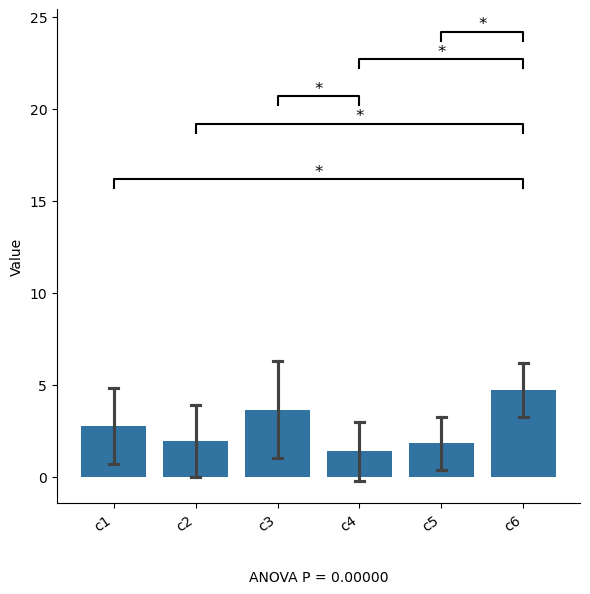

In [28]:
# familiar with diabetes vs not familiar with diabetes on acc when last step was wrong

df = load_data()
df_low = df[df['familiar_with_diabetes'] <= 4]
df_high = df[df['familiar_with_diabetes'] > 4]

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}

for condition in range(1, 7):
    for index, row in df.iterrows():
        if row['condition'] != condition: continue
        count = 0
        for i in range(1, 21):
            if row[f"{i}_ai"] != row[f"{i}_1"] and row[f"{i}_ai"] == row[f"{i}_2"]: count += 1
        user_acc[f"c{condition}"].append(count)
    key = f"c{condition}"
    print(f"Condition {condition}, count {user_acc[key]}")

# print(user_acc)
user_acc = pd.DataFrame(user_acc)
plot_bar(user_acc)

In [29]:
# familiar with diabetes vs not familiar with diabetes on acc when last step was wrong

df = load_data()

user_acc = {
    "c1": [],
    "c2": [],
    "c3": [],
    "c4": [],
    "c5": [],
    "c6": [],
}


results = []

for index, row in df.iterrows():
    user_data = {'user_id': row['user_id'], 'questions': []}
    
    for i in range(1, 21):
        question_data = {
            f'q{i}': {
                'AI_correctness': row[f'{i}_ai'] == row[f'{i}_gt'],
                'User_step_1_correctness': row[f'{i}_1'] == row[f'{i}_gt'],
                'User_step_2_correctness': row[f'{i}_2'] == row[f'{i}_gt'],
                'User_step_1_same_as_AI': row[f'{i}_1'] == row[f'{i}_ai'],
                'User_step_2_same_as_AI': row[f'{i}_2'] == row[f'{i}_ai'],
            }
        }
        user_data['questions'].append(question_data)
    
    results.append(user_data)

json_output = json.dumps(results, indent=4)

print(json_output)
with open('user_ans.json', 'w') as f:
    f.write(json_output)

# print(user_acc)
# user_acc = pd.DataFrame(user_acc)
# plot_bar(user_acc)

[
    {
        "user_id": "P2",
        "questions": [
            {
                "q1": {
                    "AI_correctness": true,
                    "User_step_1_correctness": false,
                    "User_step_2_correctness": true,
                    "User_step_1_same_as_AI": false,
                    "User_step_2_same_as_AI": true
                }
            },
            {
                "q2": {
                    "AI_correctness": true,
                    "User_step_1_correctness": false,
                    "User_step_2_correctness": true,
                    "User_step_1_same_as_AI": false,
                    "User_step_2_same_as_AI": true
                }
            },
            {
                "q3": {
                    "AI_correctness": true,
                    "User_step_1_correctness": true,
                    "User_step_2_correctness": true,
                    "User_step_1_same_as_AI": true,
                    "User_step_2_same_as_AI": true
 